In [1]:
import itertools

import matplotlib.pyplot as plt
import numpy as np

from stats import *
from utils import *
import visual as vi
from Inlier_Thresholder import Inlier_Thresholder
import scipy.io as spi
from time import time
import os
import seaborn as sns
from itertools import chain

## Fundamental Matrix Analysis

In [2]:
rootFM = '/Users/gabrielegiusti/Desktop/Progetto_IACV/adelFM/'
print(os.listdir(rootFM))
data = [f for f in os.listdir(rootFM) if os.path.isfile(rootFM + f)]
data1 = spi.loadmat(rootFM + data[13])
data2 = spi.loadmat(rootFM + data[3])
keypts = data1['data']

['cubebreadtoychips.mat', 'dinobooks.mat', 'biscuit.mat', 'game.mat', 'cube.mat', 'book.mat', 'breadtoycar.mat', 'gamebiscuit.mat', 'toycubecar.mat', 'biscuitbookbox.mat', 'breadcubechips.mat', 'breadcartoychips.mat', 'biscuitbook.mat', 'boardgame.mat', 'cubechips.mat', 'carchipscube.mat', 'cubetoy.mat', 'breadcube.mat', 'breadtoy.mat']


In [3]:
img1,img2=data1["img1"],data1["img2"]

outliers,models=vi.group_models(data1)["outliers"],vi.group_models(data1)["models"]

src_points = np.array(list(zip(models[0][0], models[0][1])))

dst_points = np.array(list(zip(models[0][2], models[0][3])))

In [4]:
t=time()
cv2_FM, cv2_mask = verify_LMEDS_FM(src_points, dst_points)
print (time()-t, ' sec cv2')

# t=time()
# gc_H, gc_mask = verify_pygcransac_H(src_points , dst_points , img1 , img2 , 2 , 10 , 20)
# print ((time()-t), ' sec gc-ransac')
#
#
#
# # Compute the element-wise difference
# difference_mask = gc_mask != cv2_mask
# difference_mask=difference_mask.astype(np.uint8)
# print("the difference between ransac and gc_ransac: ",len(difference_mask))

print("the total number of point is: ",len(src_points))

57.0 inliers found
0.005040884017944336  sec cv2
the total number of point is:  69


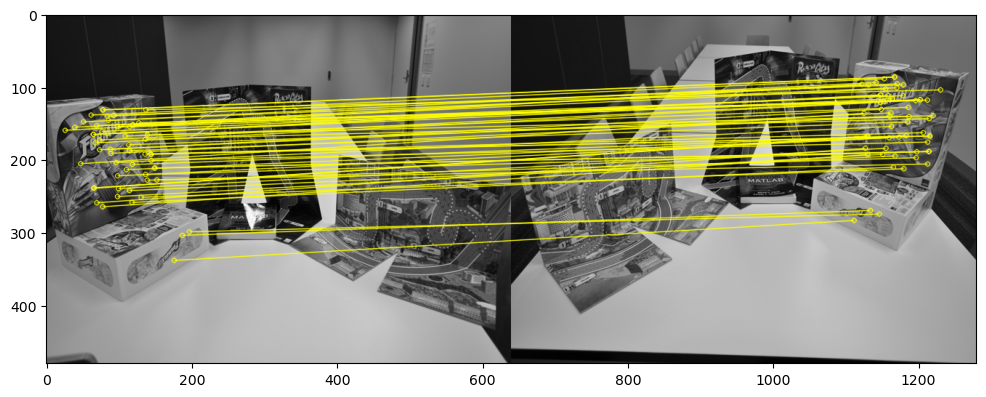

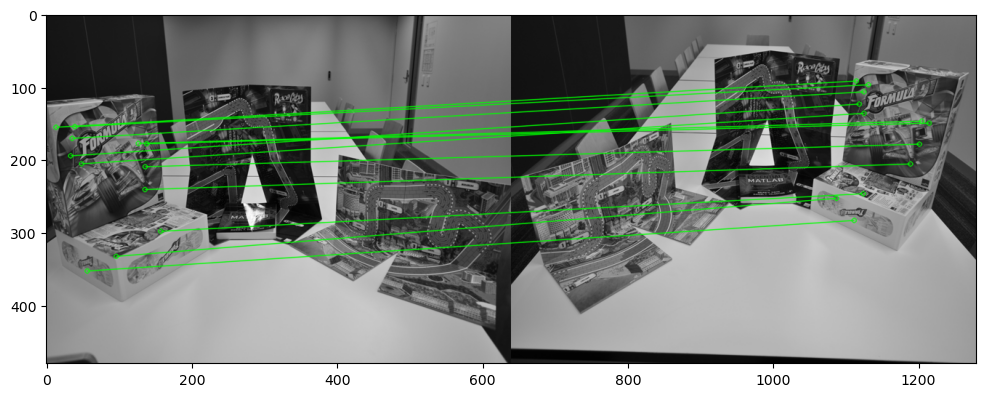

In [5]:
#draw_matches(img1,img2,src_points,dst_points,mask=gc_mask)
draw_matches(img1,img2,src_points,dst_points,mask=cv2_mask)
#draw_matches(img1,img2,src_points,dst_points, matchColor=(255,0,0) , mask=difference_mask)
draw_matches(img1,img2,src_points,dst_points, matchColor=(0,255,0) , mask=1-cv2_mask)

In [6]:
def drawlines(img1,img2,lines,pts1,pts2):
     ''' img1 - image on which we draw the epilines for the points in img2
     lines - corresponding epilines '''
     print(img1.shape)
     r,c = img1.shape[0], img1.shape[1]
     img1 = cv2.cvtColor(img1,cv2.COLOR_RGB2BGR)
     img2 = cv2.cvtColor(img2,cv2.COLOR_RGB2BGR)
     for r,pt1,pt2 in zip(lines,pts1,pts2):
         color = tuple(np.random.randint(0,255,3).tolist())
         x0,y0 = map(int, [0, -r[2]/r[1] ])
         x1,y1 = map(int, [c, -(r[2]+r[0]*c)/r[1] ])
         img1 = cv2.line(img1, (x0,y0), (x1,y1), color,1)
         img1 = cv2.circle(img1,tuple(np.array(pt1).astype(int)),5,color,-1)
         img2 = cv2.circle(img2,tuple(np.array(pt2).astype(int)),5,color,-1)
     return img1,img2


(480, 640)
(480, 640)


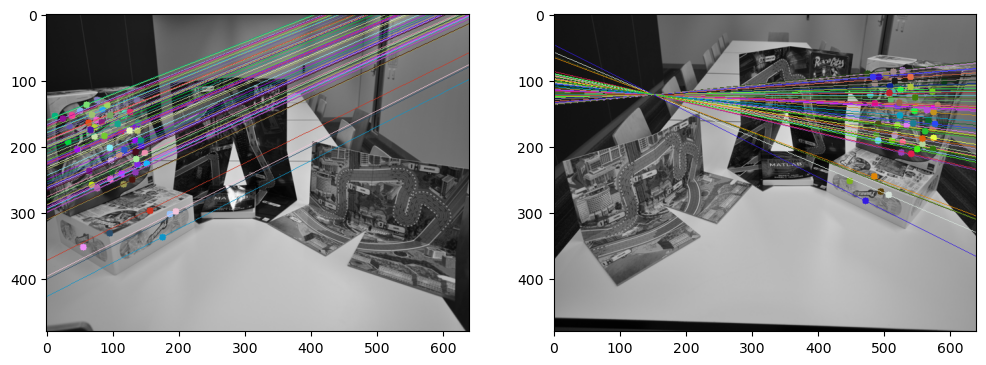

In [7]:
# Find epilines corresponding to points in right image (second image) and
# drawing its lines on left image
lines1 = cv2.computeCorrespondEpilines(dst_points.reshape(-1,1,2), 2,cv2_FM)
lines1 = lines1.reshape(-1,3)
img5,img6 = drawlines(img1,img2,lines1,src_points,dst_points)
# Find epilines corresponding to points in left image (first image) and
# drawing its lines on right image
lines2 = cv2.computeCorrespondEpilines(src_points.reshape(-1,1,2), 1,cv2_FM)
lines2 = lines2.reshape(-1,3)
img3,img4 = drawlines(img2,img1,lines2,dst_points,src_points)
plt.figure(figsize=(12,8))
plt.subplot(121),plt.imshow(img5)
plt.subplot(122),plt.imshow(img3)
plt.show()

In [8]:
compute_residuals_FM(src_points, dst_points, cv2_FM, method='sed')

array([6.70016828e-01, 3.83983866e-02, 7.73387206e-02, 5.12751007e-14,
       6.80618030e-02, 4.33775932e-01, 8.76643483e-02, 8.76643483e-02,
       1.10108514e-01, 9.01055825e-02, 2.82256288e-01, 5.84199357e-01,
       1.42448260e-01, 4.87319532e-14, 4.87319532e-14, 3.70062105e-01,
       4.06335014e-01, 7.40694749e-01, 7.40694749e-01, 3.37288079e-14,
       2.37645341e+01, 1.07976189e-01, 6.51450071e-01, 1.25969726e-01,
       2.13298757e-01, 2.60929302e-01, 2.70419350e-01, 9.33254421e-02,
       1.20183683e+00, 9.38986850e-02, 9.38986850e-02, 3.33653917e-01,
       1.33431141e-13, 9.26990909e-01, 5.87947647e-01, 1.14965019e+00,
       1.73467118e-01, 5.34224603e+01, 2.16977960e-02, 2.16977960e-02,
       4.21870998e-01, 1.07998801e-01, 1.52593637e-01, 1.51833046e-01,
       2.25570603e-01, 6.72887419e-01, 9.96039652e-14, 5.92476450e-01,
       1.68883632e+00, 8.48611268e-01, 1.48185030e+00, 3.18924987e-01,
       6.17048531e-01, 6.17048531e-01, 1.22846688e-01, 6.73428662e-01,
      

In [9]:
compute_residuals_FM(src_points, dst_points, cv2_FM, method='sampson')

array([1.08686724e-01, 3.64947035e-04, 1.48143281e-03, 7.06182850e-29,
       1.15785544e-03, 4.69492785e-02, 1.92092914e-03, 1.92092914e-03,
       3.01828647e-03, 2.01726533e-03, 1.97999113e-02, 8.51763375e-02,
       5.04364182e-03, 5.59163453e-28, 5.59163453e-28, 3.39811124e-02,
       4.06392346e-02, 1.35178985e-01, 1.35178985e-01, 2.81908222e-28,
       1.30151100e+02, 2.89615554e-03, 1.05313077e-01, 3.96112783e-03,
       1.13717450e-02, 1.70208214e-02, 1.82288346e-02, 2.17383614e-03,
       3.59424294e-01, 2.19002009e-03, 2.19002009e-03, 2.74930917e-02,
       1.10711128e-27, 2.01972009e-01, 8.19376739e-02, 3.15707901e-01,
       7.23610238e-03, 6.80916784e+02, 1.14747637e-04, 1.14747637e-04,
       4.31200030e-02, 2.86065340e-03, 5.76135977e-03, 5.73251904e-03,
       1.26453880e-02, 1.12950600e-01, 2.53849139e-28, 8.77562962e-02,
       6.52479443e-01, 1.69827945e-01, 5.20430258e-01, 2.42896283e-02,
       9.22472990e-02, 9.22472990e-02, 3.70376242e-03, 1.10355855e-01,
      

In [10]:
point_belongs_to_model(models, type='FM', threshold=1, method='sampson')

61.0 inliers found
59.0 inliers found
18.0 inliers found


{'model1_point2': [],
 'model1_point3': [44, 64],
 'model2_point1': [],
 'model2_point3': [],
 'model3_point1': [7],
 'model3_point2': []}

61.0 inliers found
59.0 inliers found
18.0 inliers found
No ambiguous points found for model 1
18.0 inliers found
61.0 inliers found
(480, 640)
(480, 640)


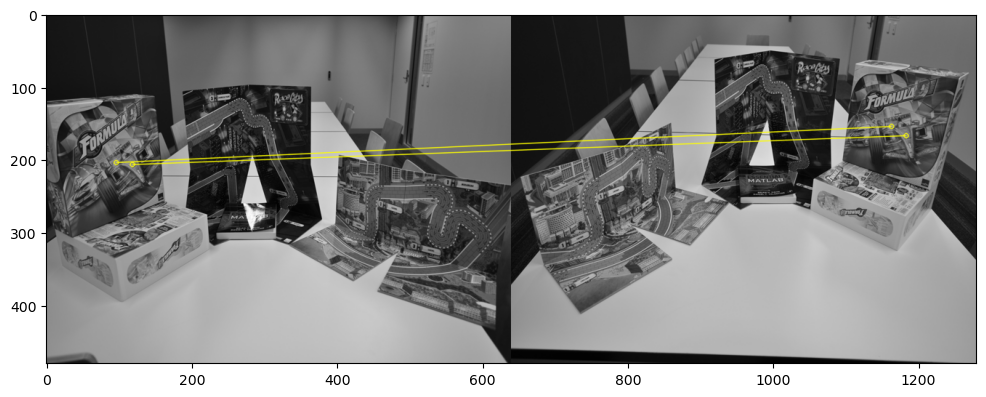

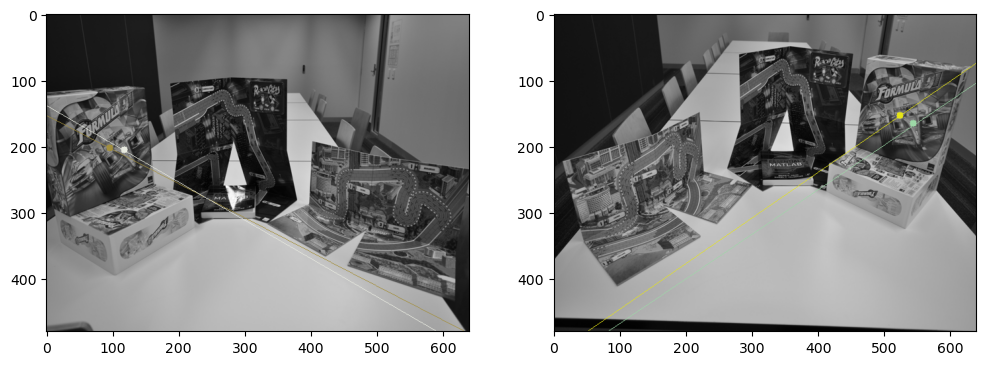

No ambiguous points found for model 0
No ambiguous points found for model 2
61.0 inliers found
18.0 inliers found
(480, 640)
(480, 640)


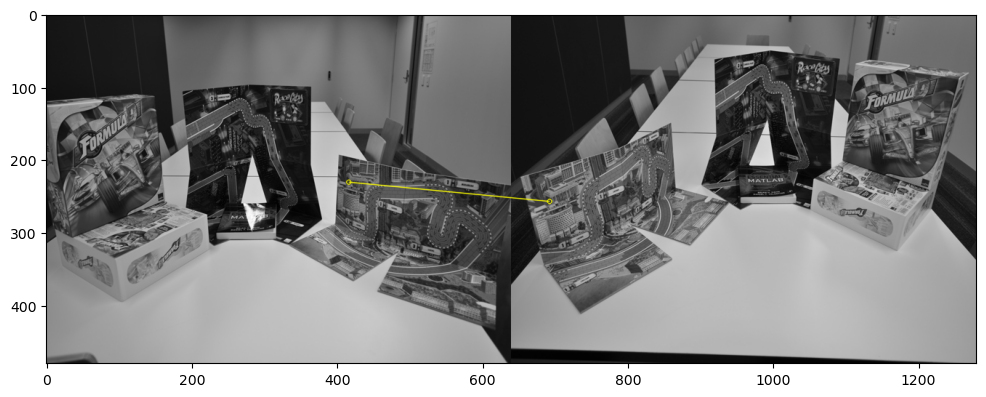

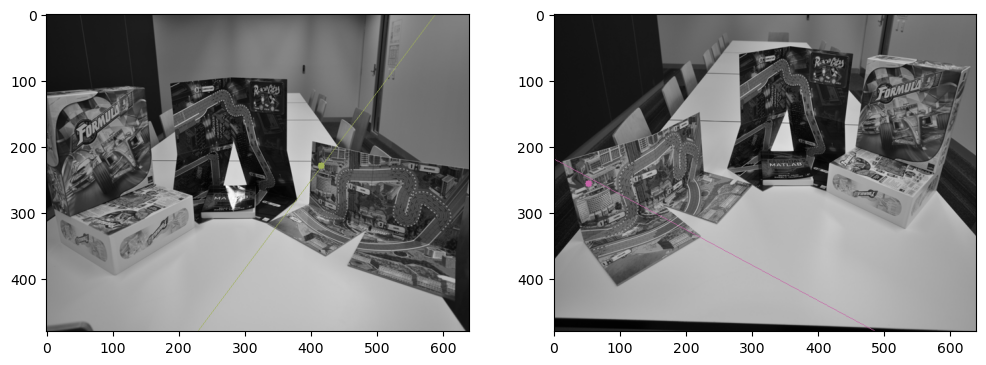

No ambiguous points found for model 1


In [11]:
correspondences = point_belongs_to_model(models, type='FM', threshold=1, method='sampson')
for corr in correspondences:
    m_idx = int(corr[-1])-1
    p_idx = int(corr[5])-1
    ambiguous_model_points = correspondences.get(corr)
    if len(ambiguous_model_points) > 0:

        src_points0 = np.array(list(zip(models[m_idx][0], models[m_idx][1])))
        dst_points0 = np.array(list(zip(models[m_idx][2], models[m_idx][3])))
        src_points = np.array(list(zip(models[p_idx][0], models[p_idx][1])))
        dst_points = np.array(list(zip(models[p_idx][2], models[p_idx][3])))

        FM0,mask0 = verify_cv2_FM(src_points0, dst_points0)
        FM,mask = verify_cv2_FM(src_points, dst_points)

        draw_matches(img1, img2, src_points[ambiguous_model_points], dst_points[ambiguous_model_points])
        
        cv2_dst_lines = cv2.computeCorrespondEpilines(src_points.reshape(-1,1,2), 1,FM0)
        cv2_src_lines = cv2.computeCorrespondEpilines(dst_points.reshape(-1,1,2), 2,FM0)
        cv2_src_lines = cv2_src_lines.reshape(-1,3)
        img5,img6 = drawlines(img1,img2,cv2_src_lines[ambiguous_model_points],src_points[ambiguous_model_points],dst_points[ambiguous_model_points])
        cv2_dst_lines = cv2_dst_lines.reshape(-1,3)
        img3,img4 = drawlines(img2,img1,cv2_dst_lines[ambiguous_model_points],dst_points[ambiguous_model_points],src_points[ambiguous_model_points])

        plt.figure(figsize=(12,8))
        plt.subplot(121),plt.imshow(img5)
        plt.grid(False)
        plt.subplot(122),plt.imshow(img3)
        plt.grid(False)
        plt.show()
        #draw_matches(img1, img2, src_points[ambiguous_model_points], cv2_dst_lines[ambiguous_model_points])
        #draw_matches(img1, img2, src_points, cv2_dst_lines)
    else:
        print("No ambiguous points found for model", m_idx)

## Analysis of residuals

In [12]:
directory = '/Users/gabrielegiusti/Desktop/Progetto_IACV/adelFM'

# List all files in the directory
files = os.listdir(directory)

# Filter out only the .mat files
mat_files = [file for file in files if file.endswith('.mat')]

# Load each .mat file
mat_data = {}
names=[]
for file in mat_files:
    file_path = os.path.join(directory, file)
    names.append(file)
    mat_data[file] = spi.loadmat(file_path)

In [13]:
number_of_data_to_analyse=len(names)
silhouette_scores = [[] for i in range(number_of_data_to_analyse)]
silhouette_avgs = [[] for i in range(number_of_data_to_analyse)]
labels_array = [[] for i in range(number_of_data_to_analyse)]
residuals = []
values_array = [[] for i in range(number_of_data_to_analyse)]
thresholds = [[] for i in range(number_of_data_to_analyse)]
for i in range(number_of_data_to_analyse):
    data=mat_data[names[i]]
    res=compute_inliers_residual_curve(data, type='FM')
    residuals.append(res)

    for j in range(len(res)):
        anomaly_detector=Inlier_Thresholder(res[j])
        #labels=anomaly_detector.compute_inlier_threshold("Rosseeuw QN")
        plt.figure()
        labels, threshold=anomaly_detector.use_best_method()
        #plot_res_curve(res[j],labels,"figure: "+str(i+1)+" Model: "+str(j+1))
        if len(np.unique(labels))!=1:
            if threshold is not None: thresholds[i].append(threshold)
            else: thresholds[i].append(0.95)
            labels_array[i].append(labels)
            silhouette_scr, silhouette_avg, values = silhouette_score_and_average(res[j], labels)
            silhouette_scores[i].append(silhouette_scr)
            silhouette_avgs[i].append(silhouette_avg)
            values_array[i].append(values)

Variance based
Variance based
IQR
Variance based
Variance based
Variance based
Variance based
Variance based
Variance based
Variance based
Variance based
Variance based
Variance based
Variance based
Variance based
Variance based
Variance based
Variance based
Median AD
Variance based
Variance based
Variance based


/var/folders/8y/rj__37254bl5rqq1swpv9p2m0000gn/T/ipykernel_16830/2918435555.py:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


Variance based
Variance based
IQR
IQR
DBSCAN
Variance based
Variance based
Variance based
Variance based
Variance based
Variance based
Variance based
Variance based
Variance based
Variance based
First Jump
Variance based
Variance based
Variance based
Variance based
Variance based
Variance based
Variance based


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

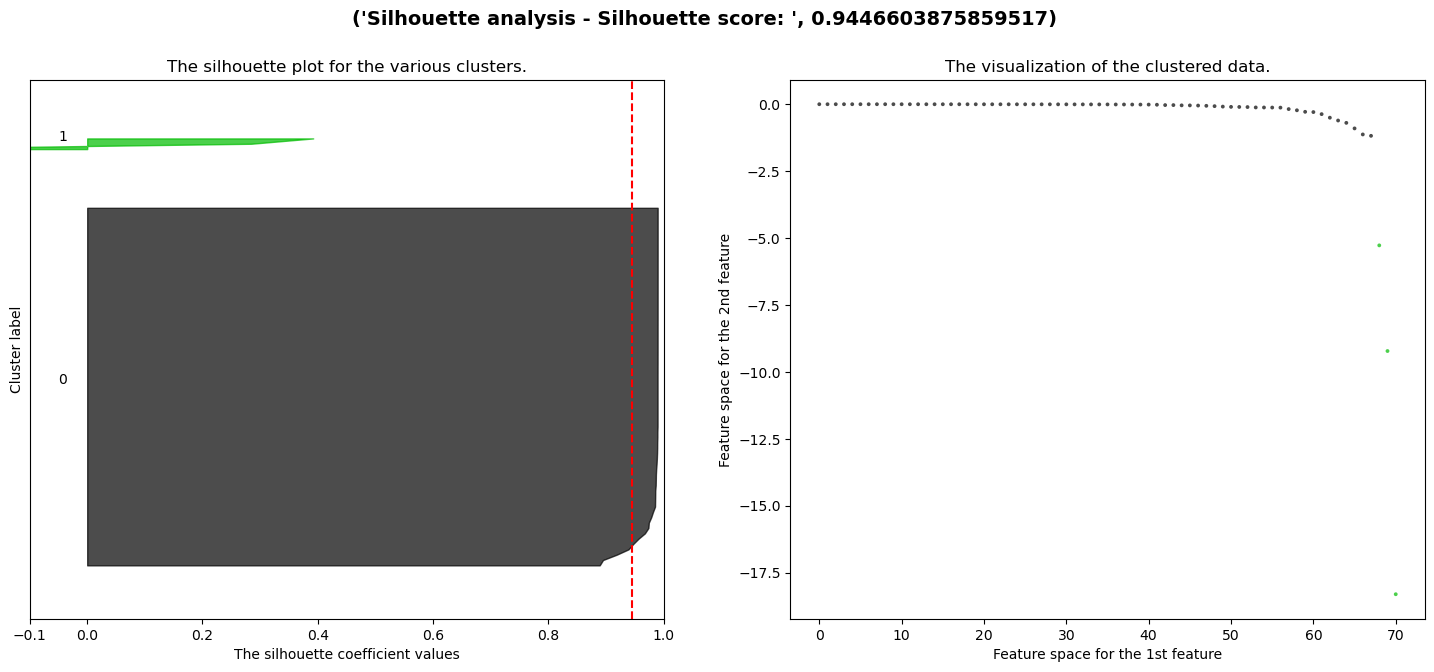

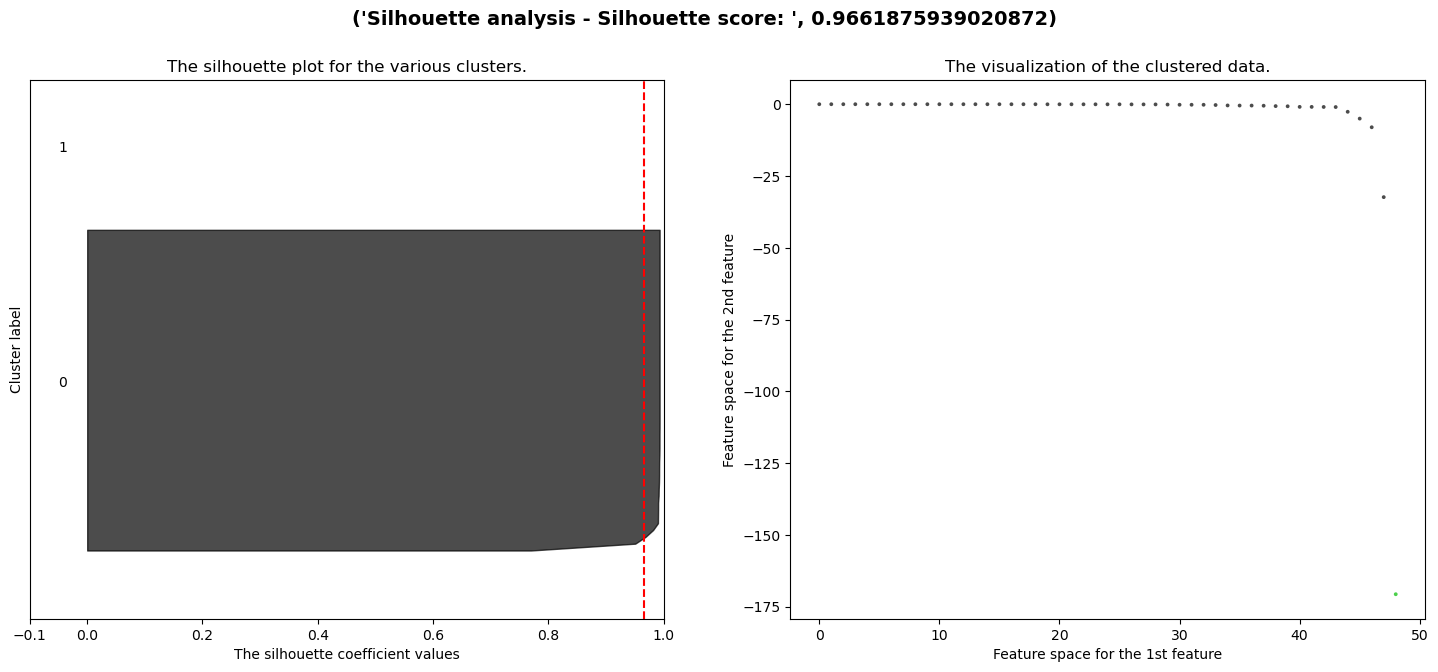

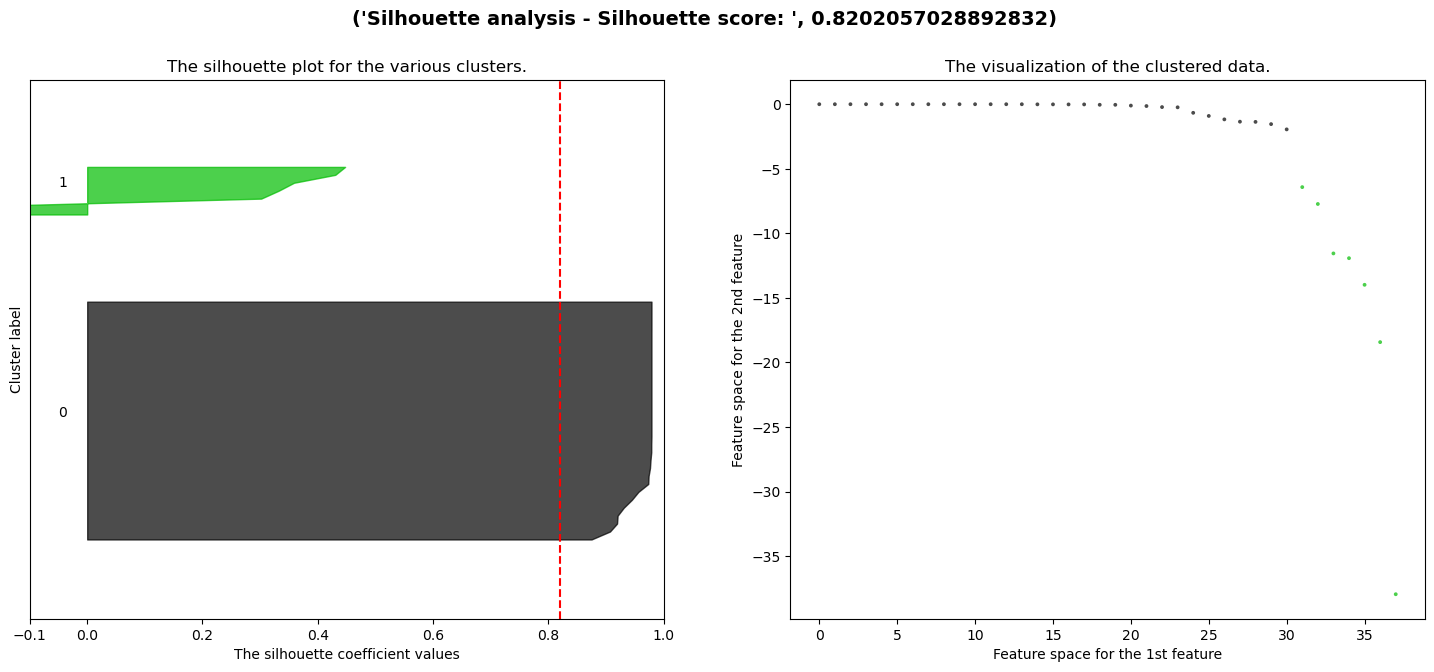

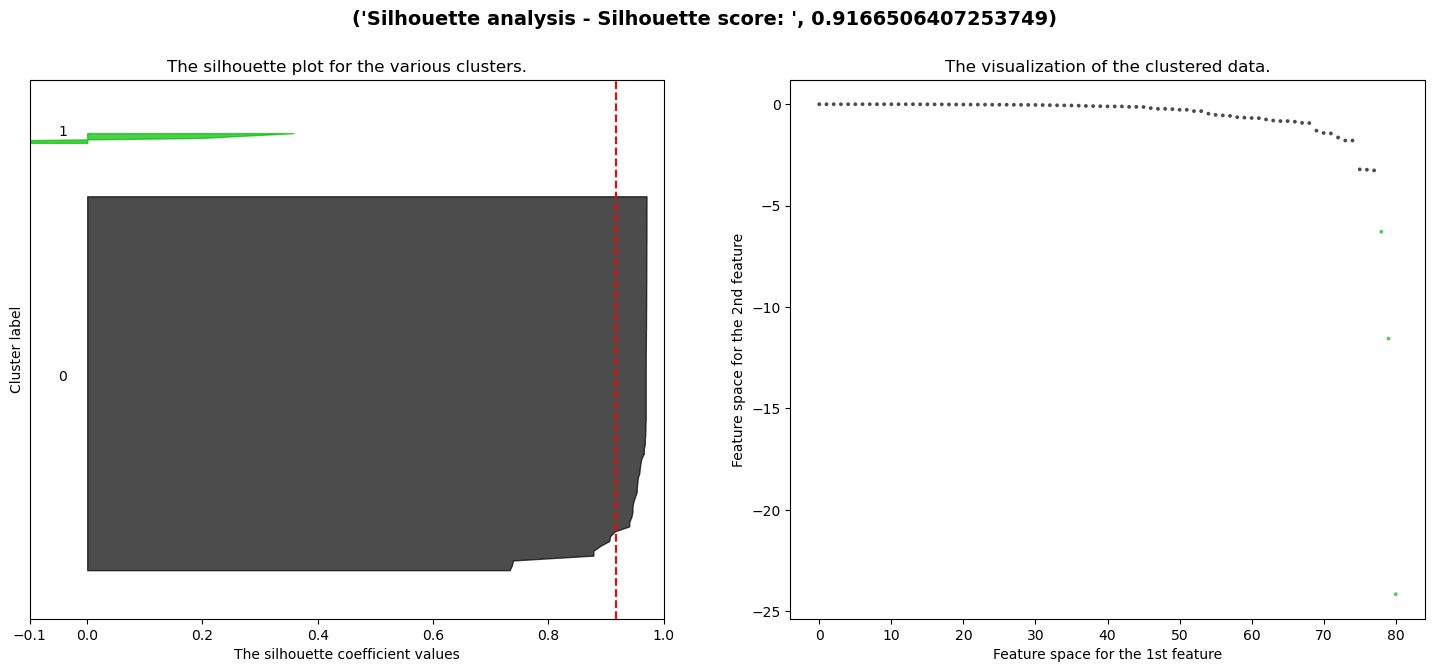

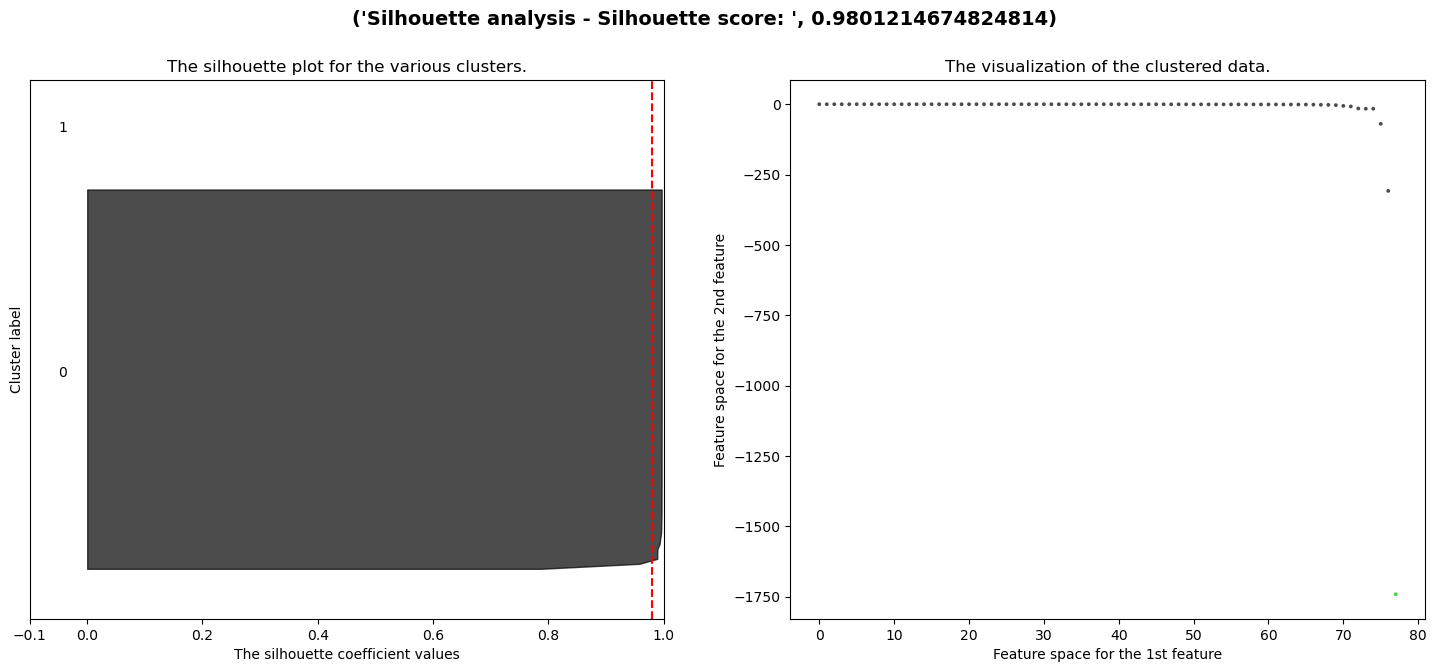

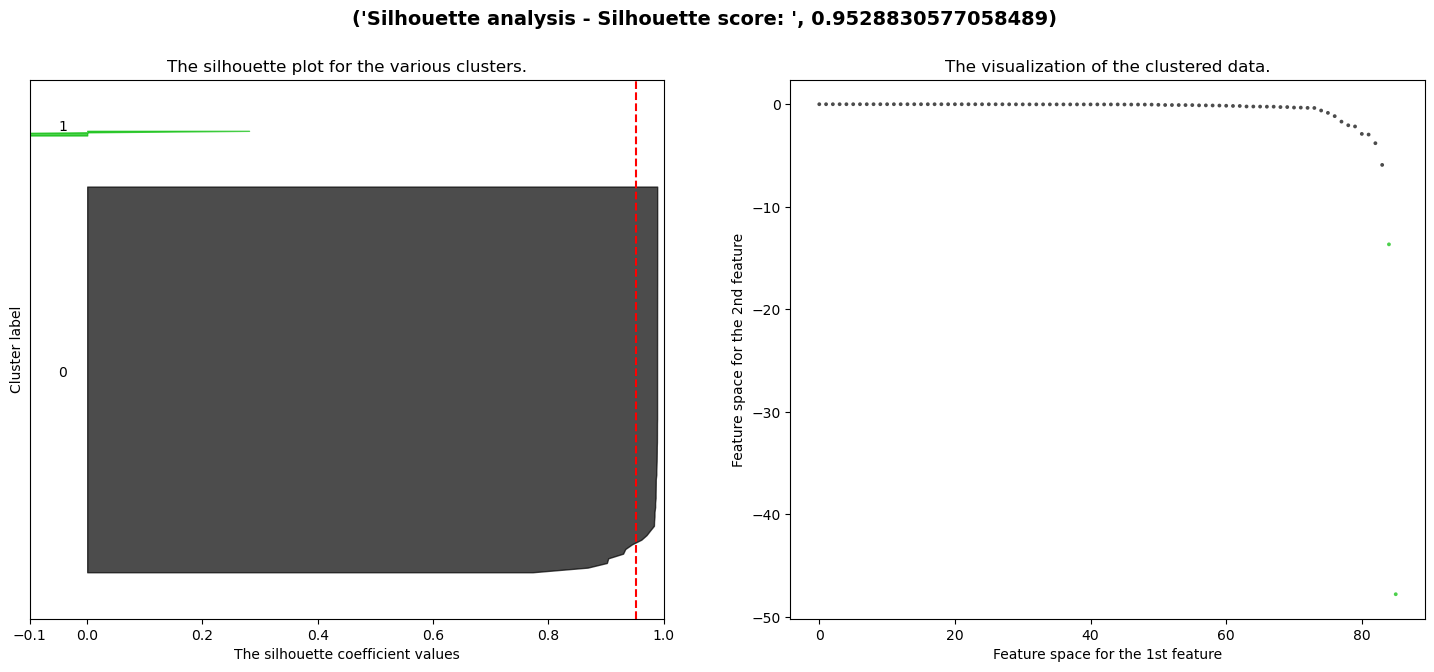

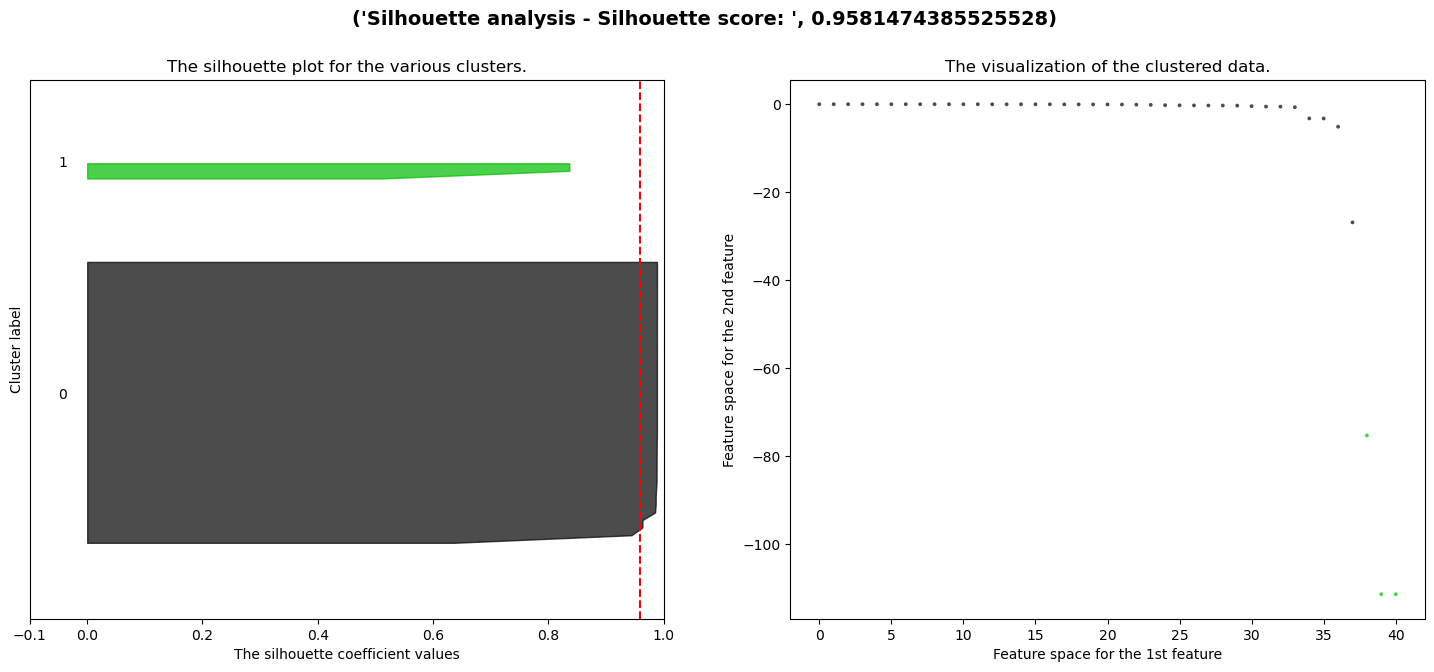

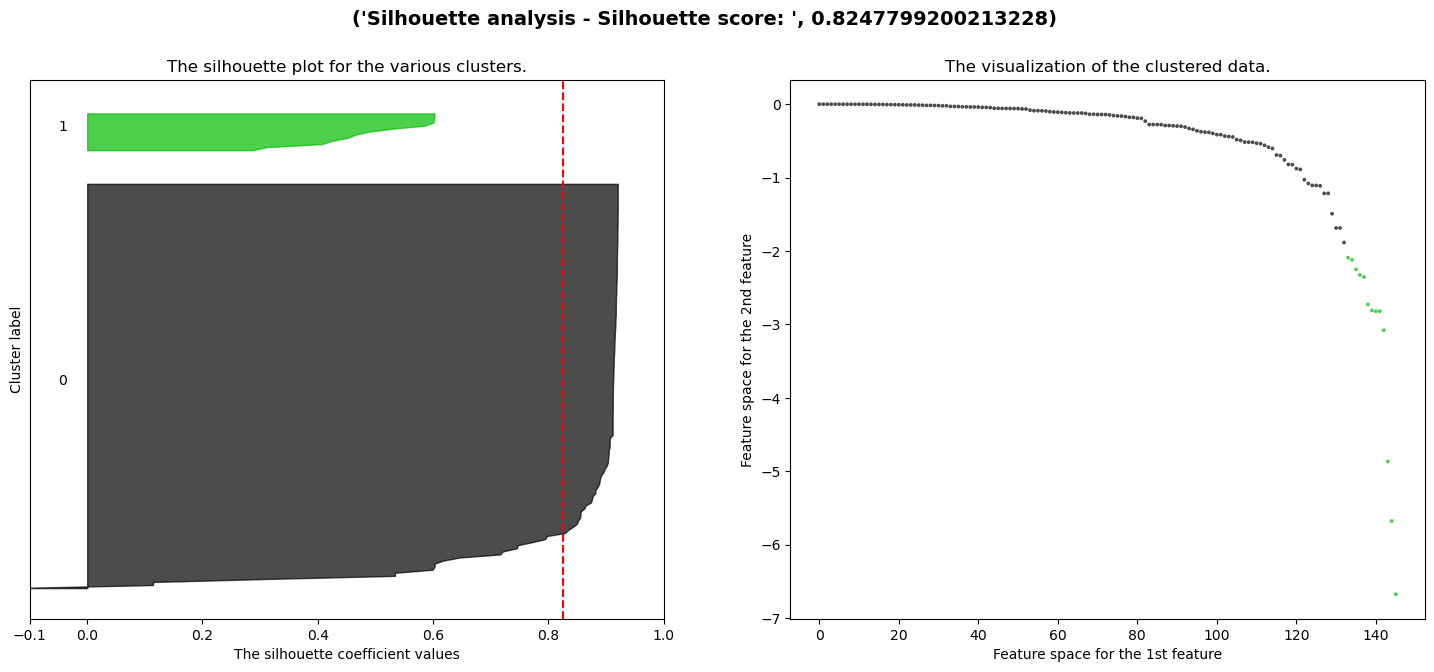

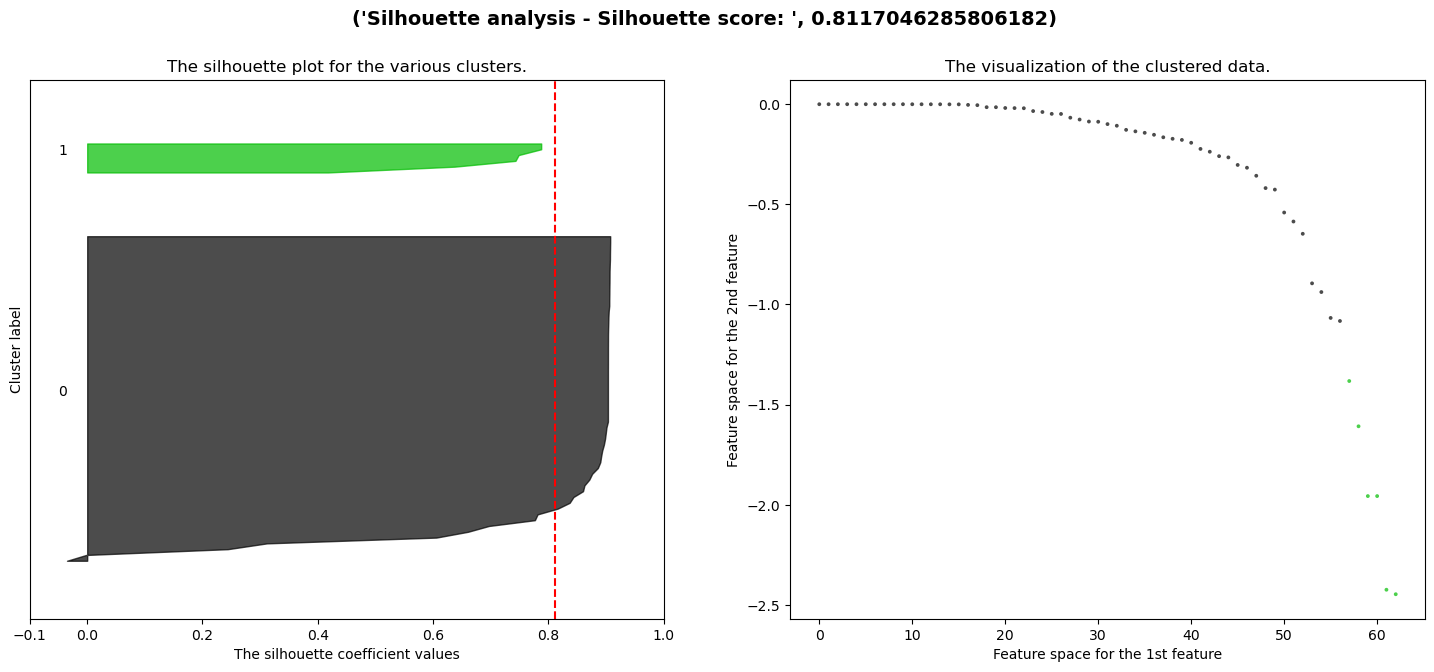

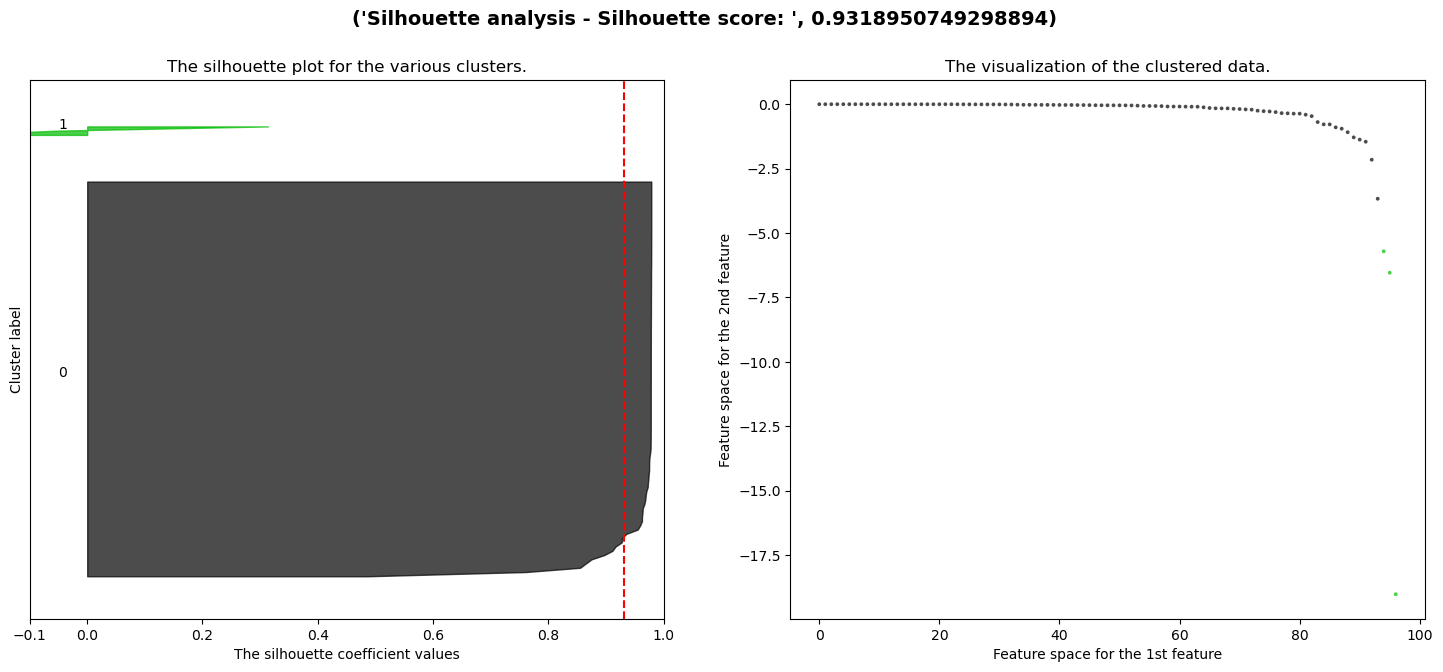

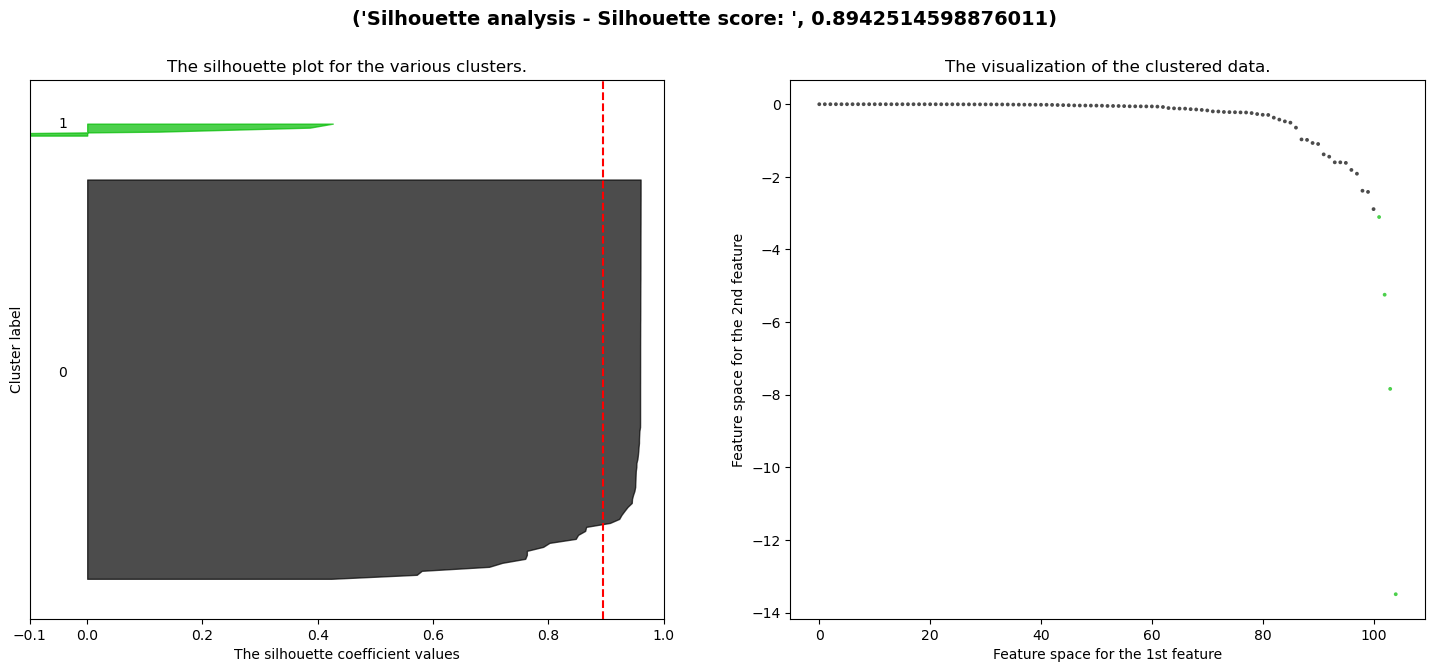

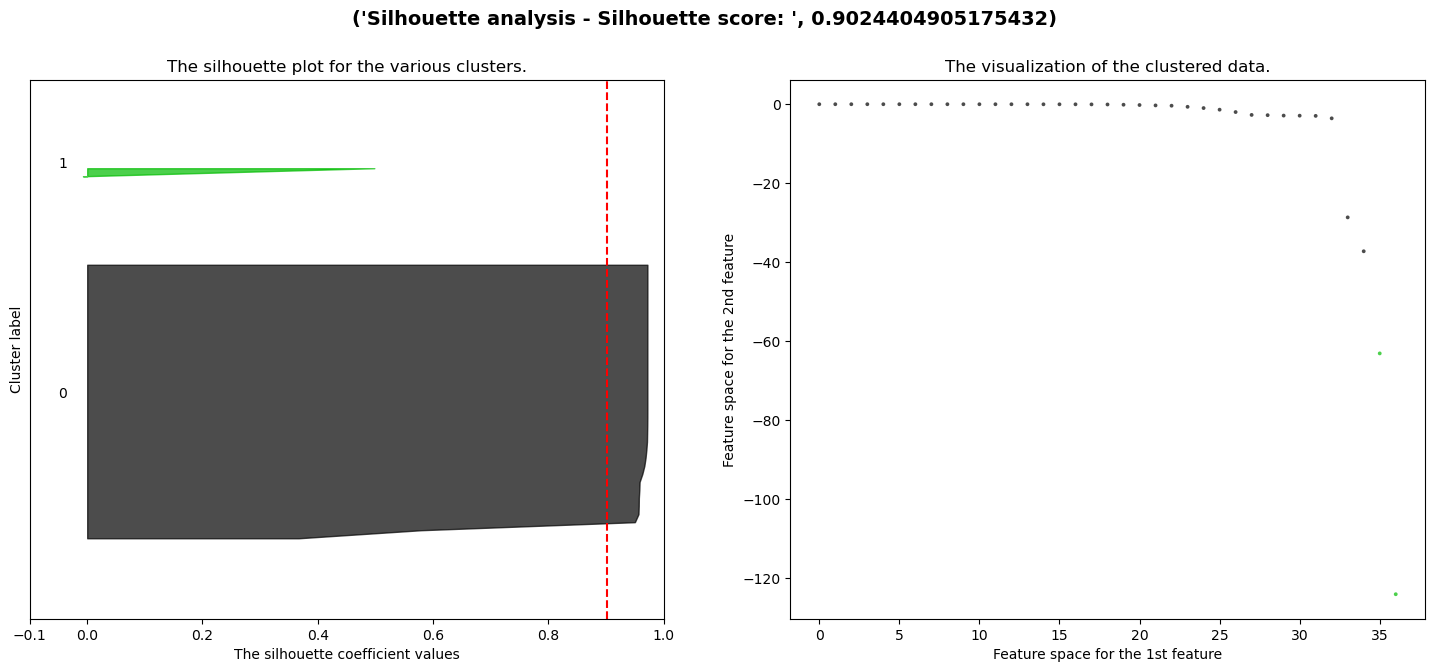

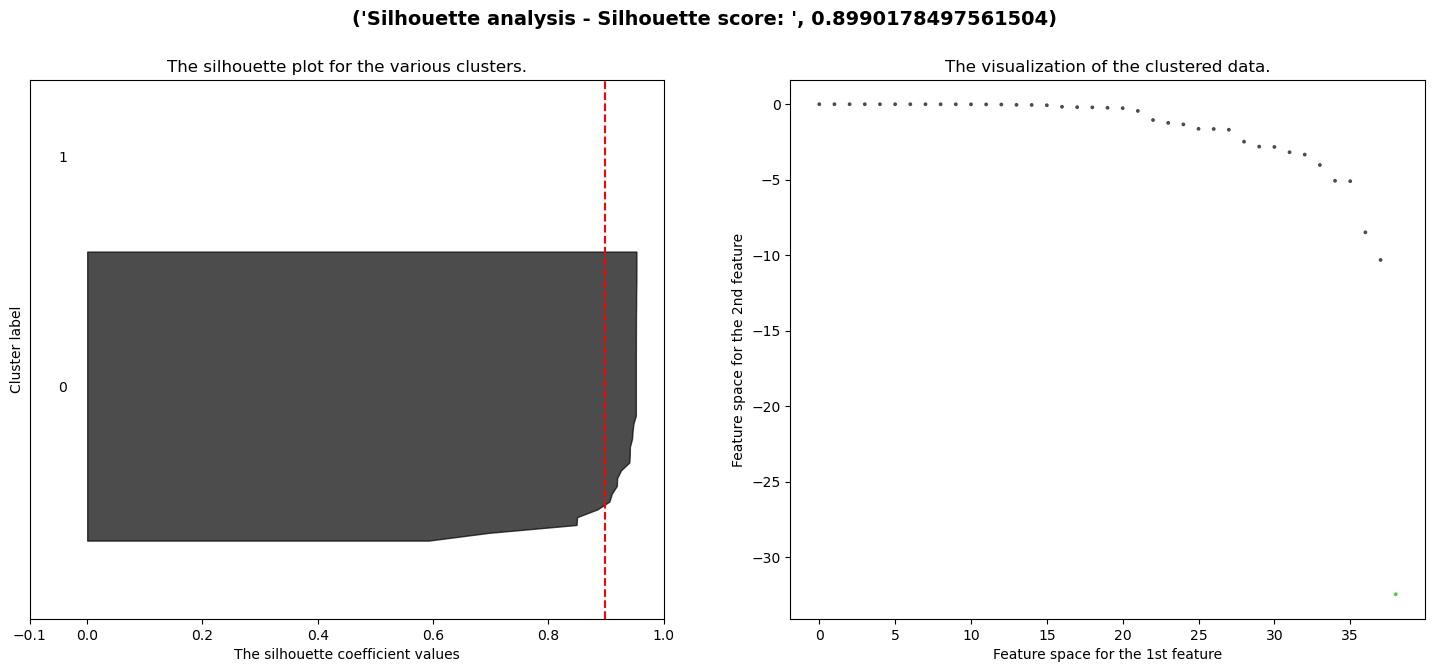

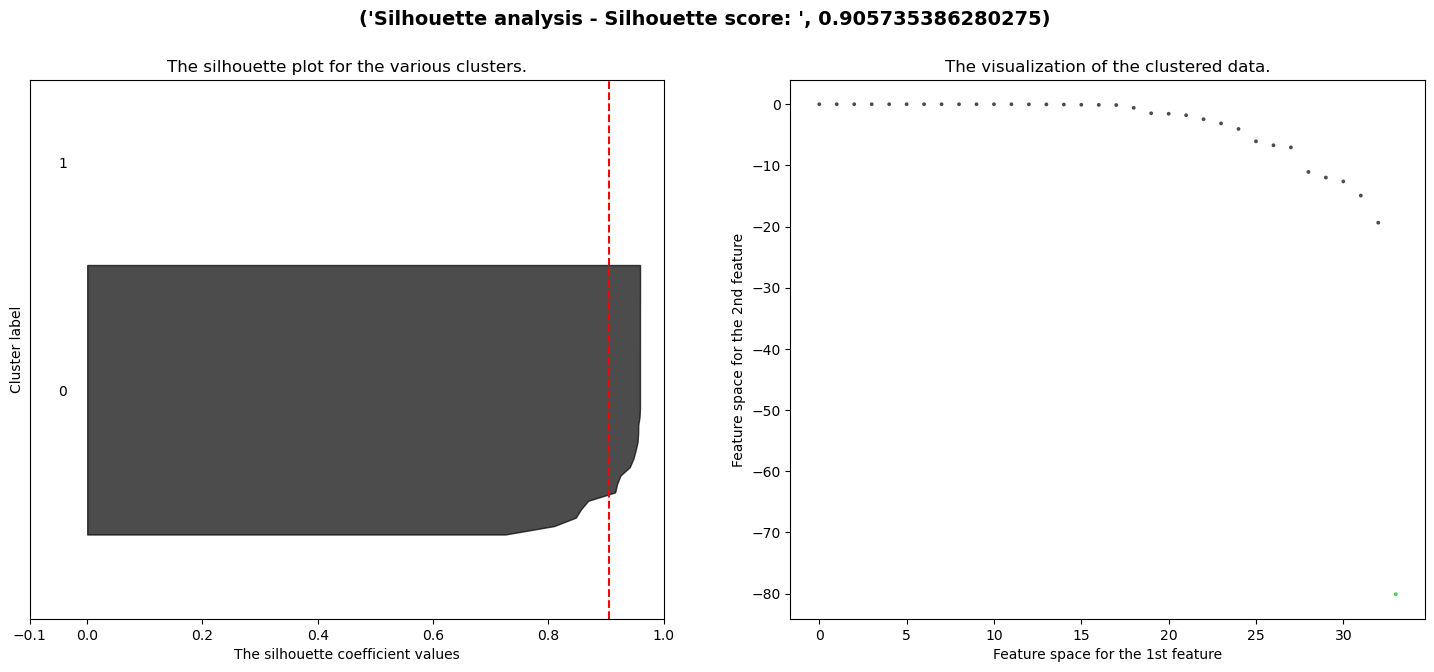

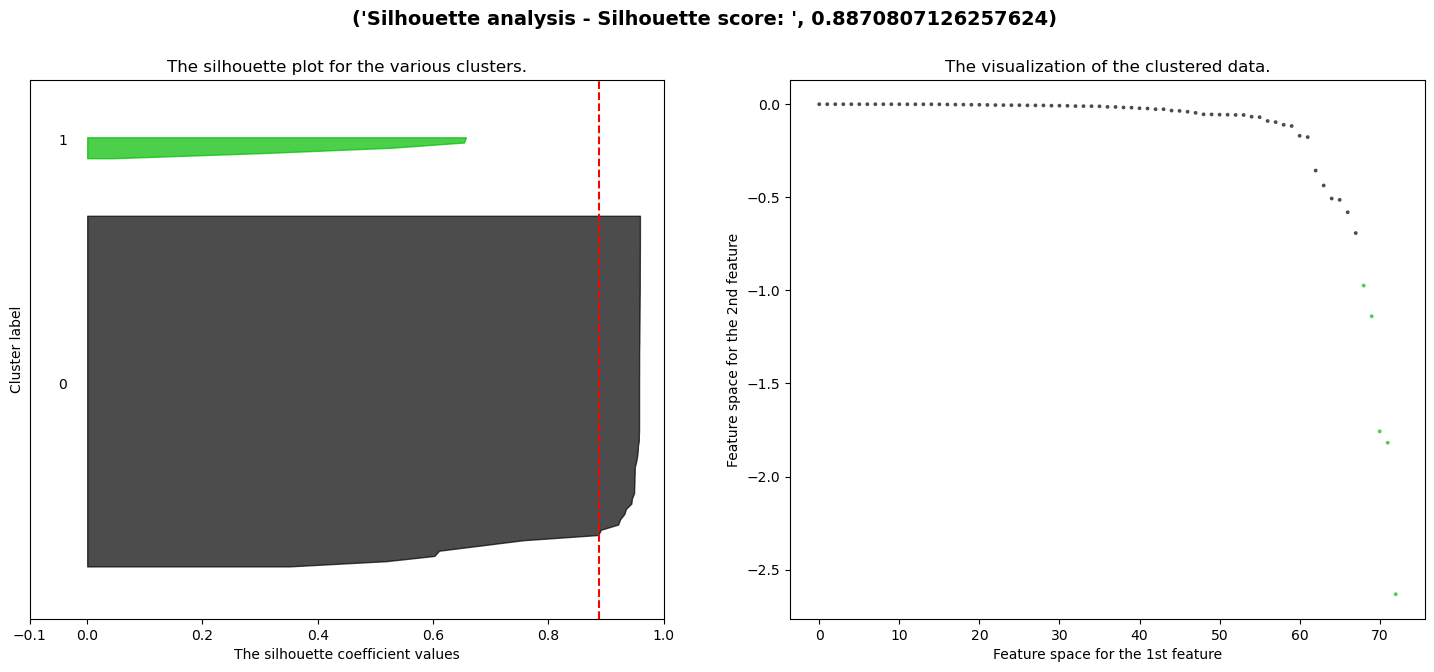

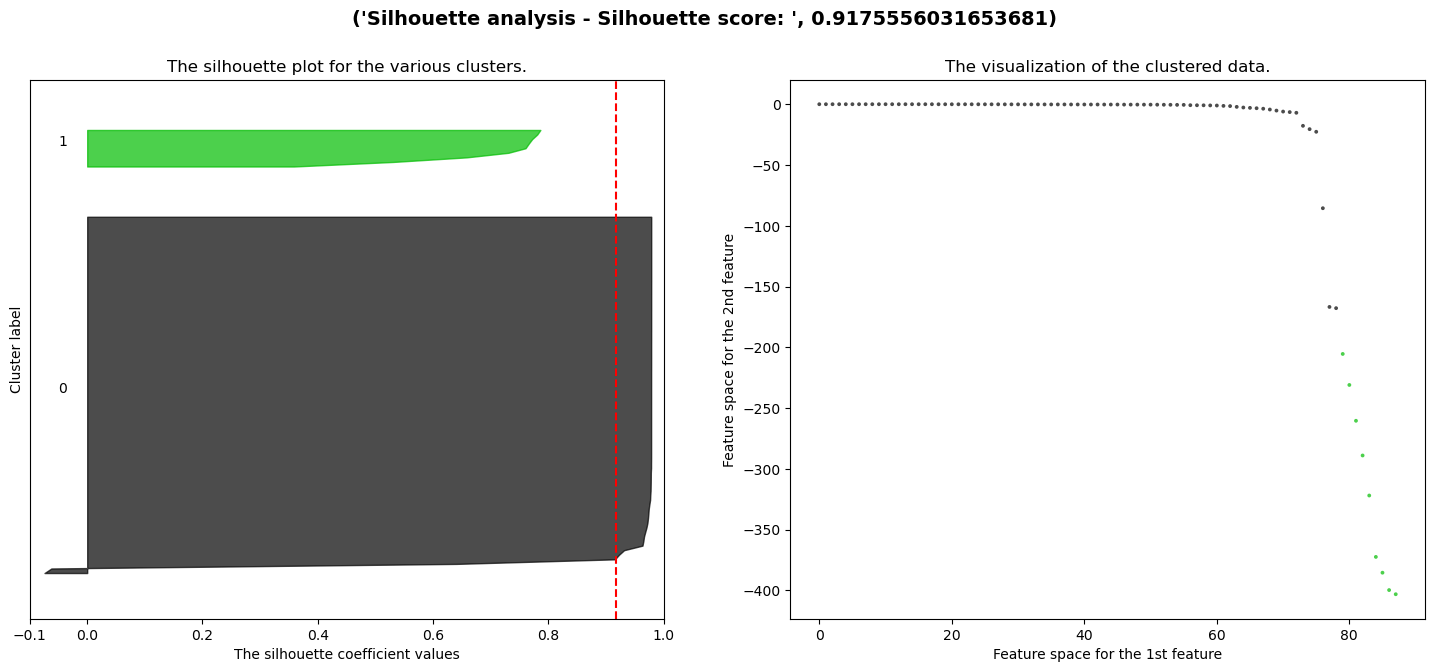

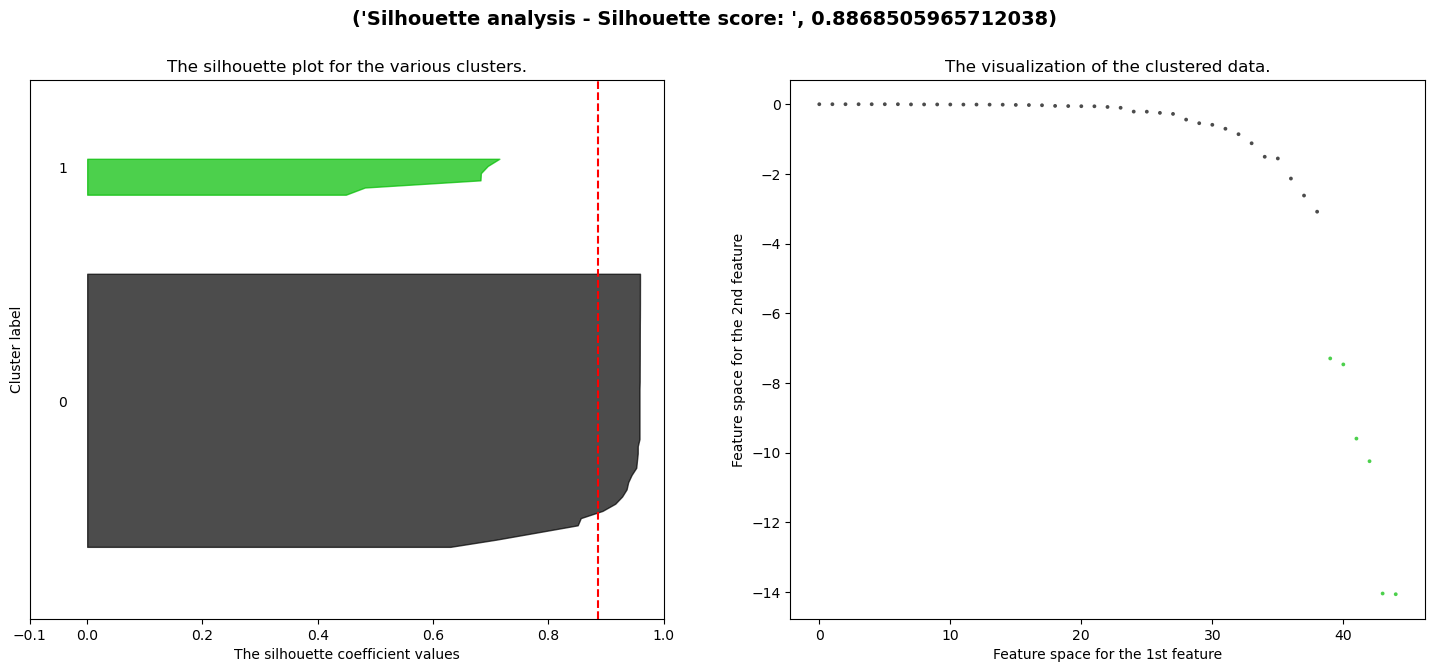

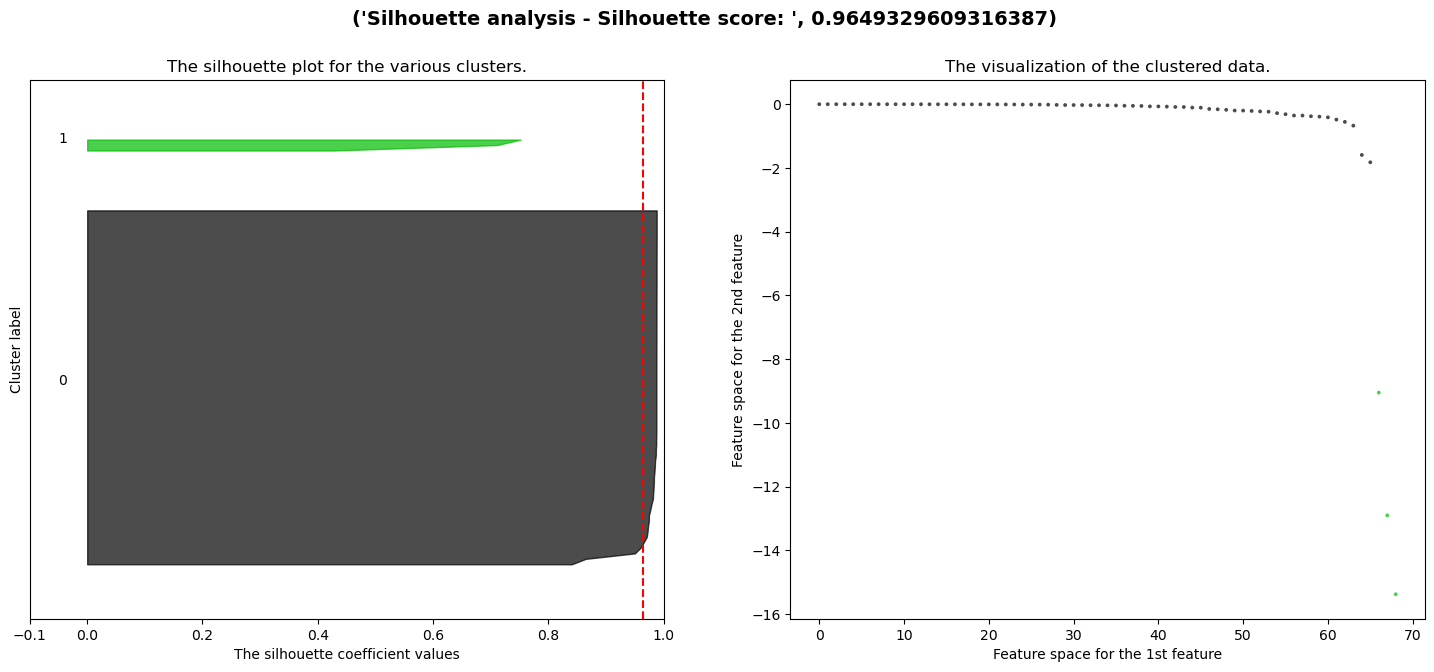

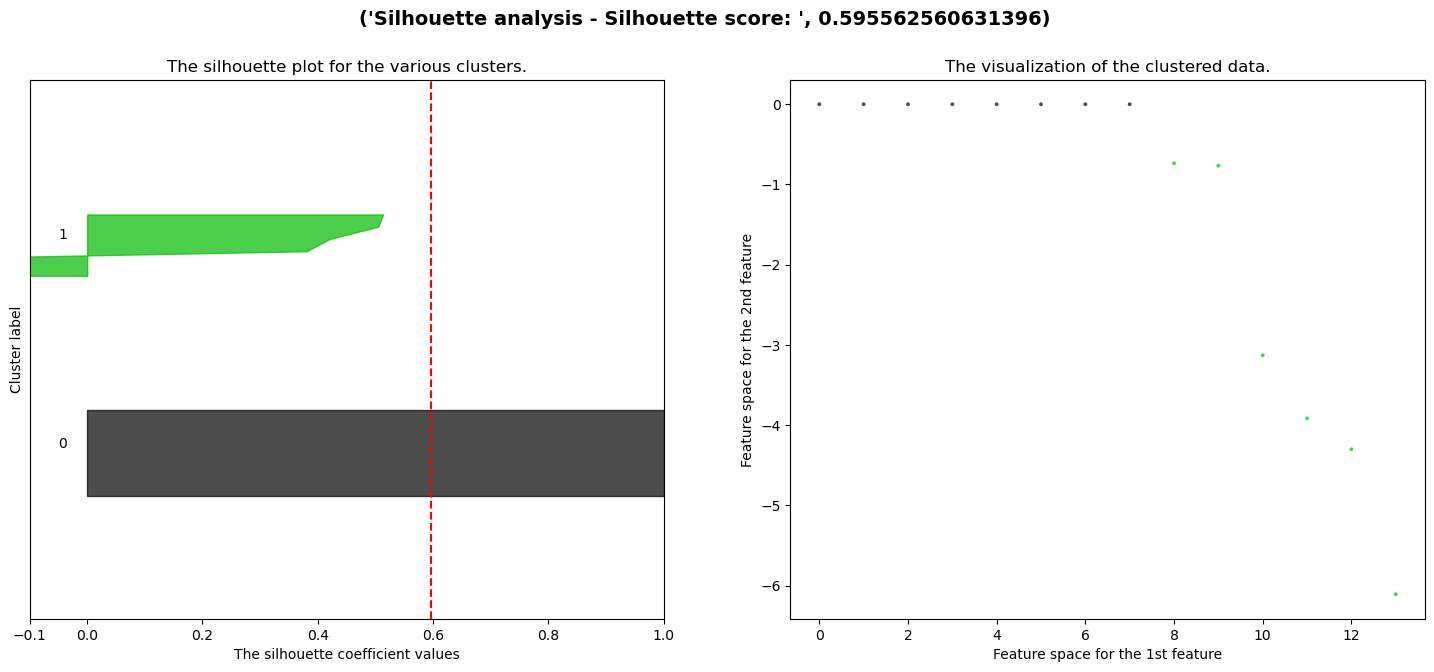

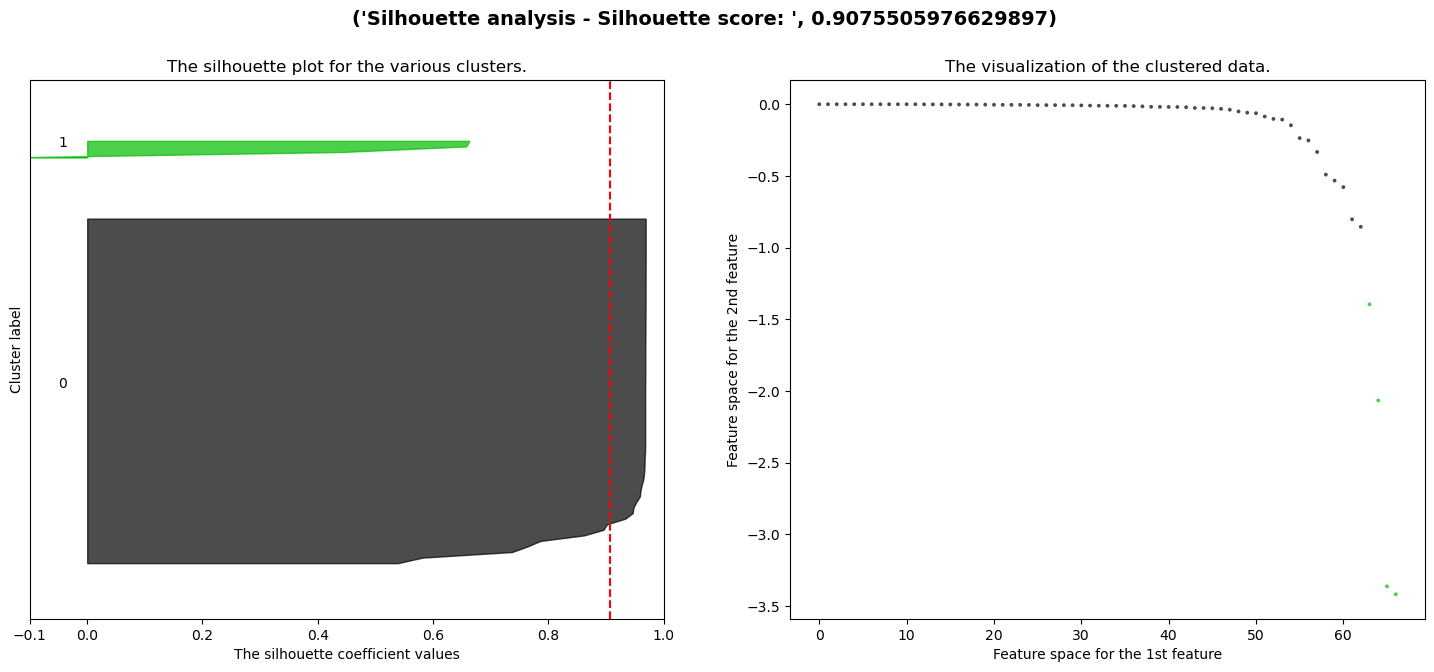

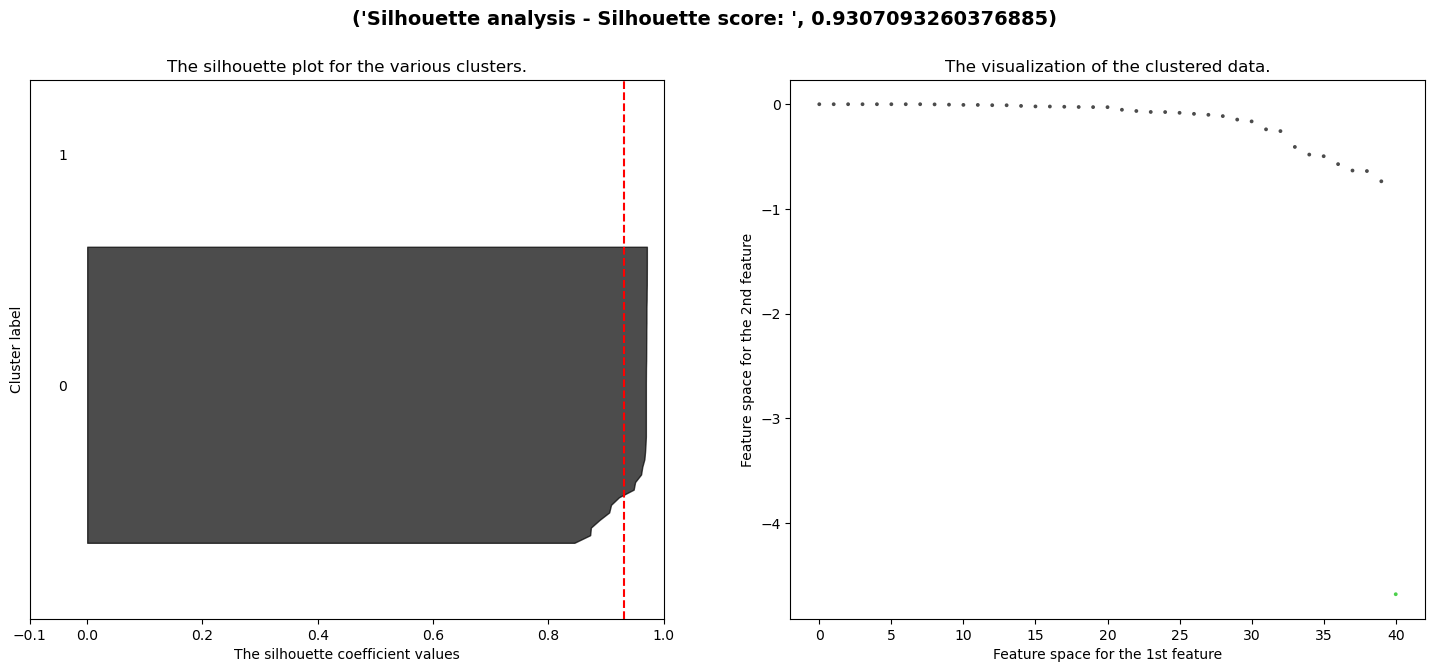

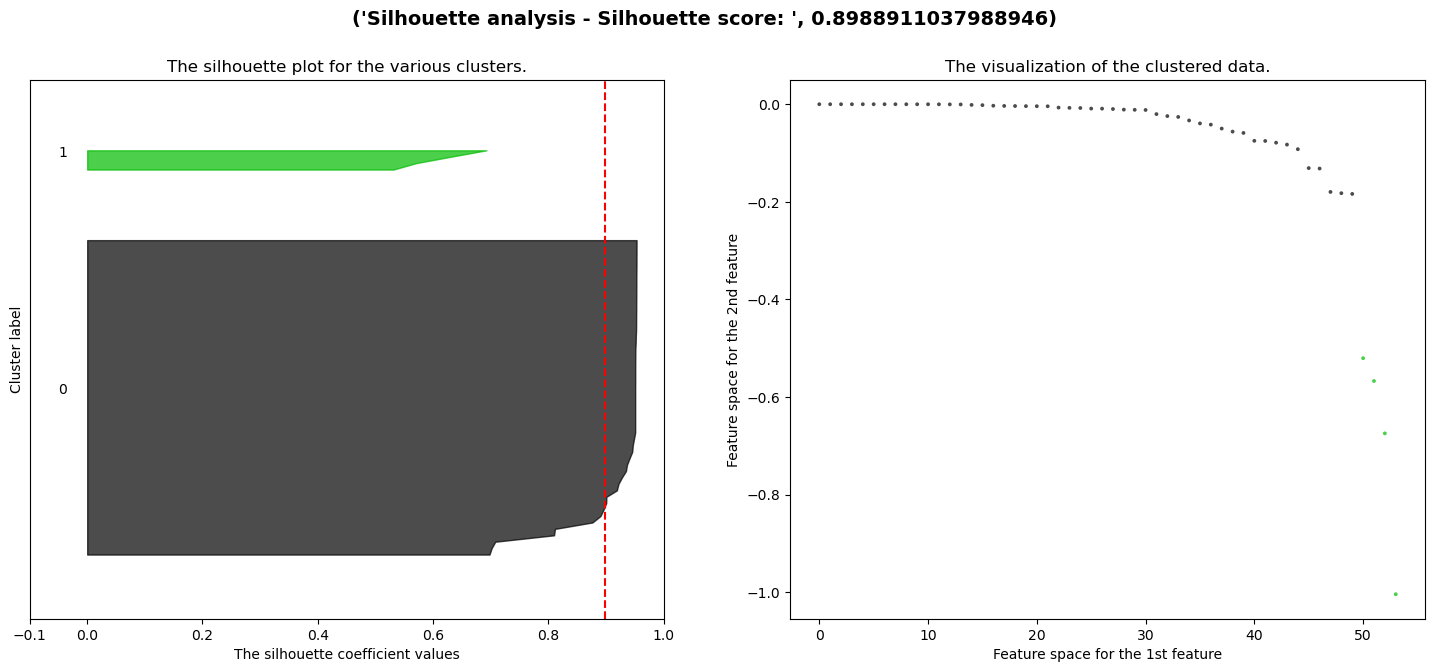

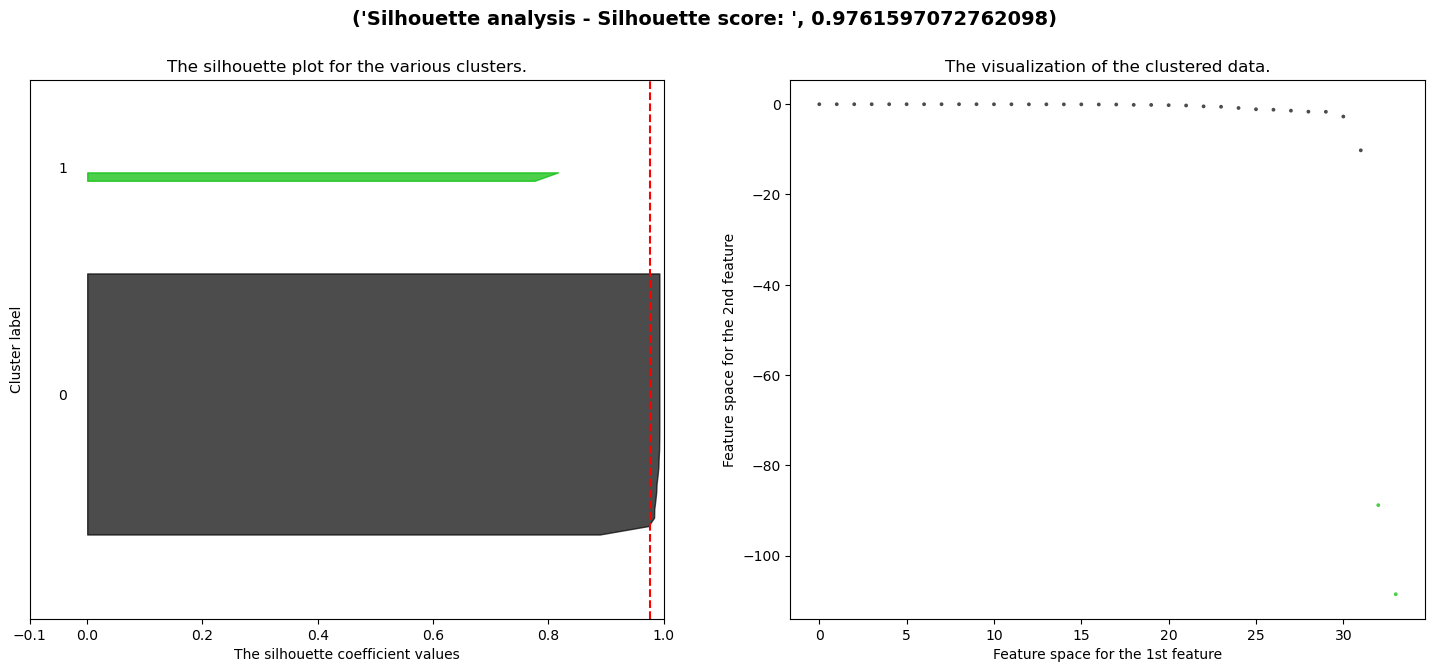

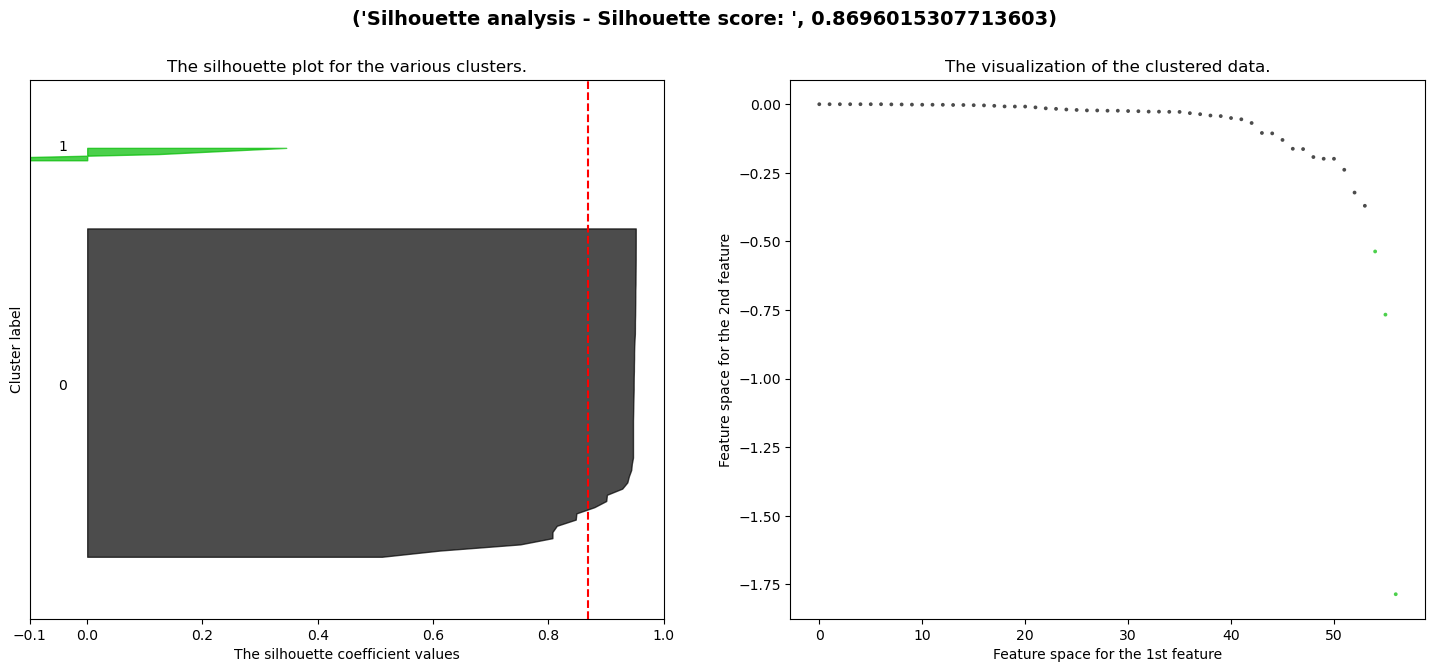

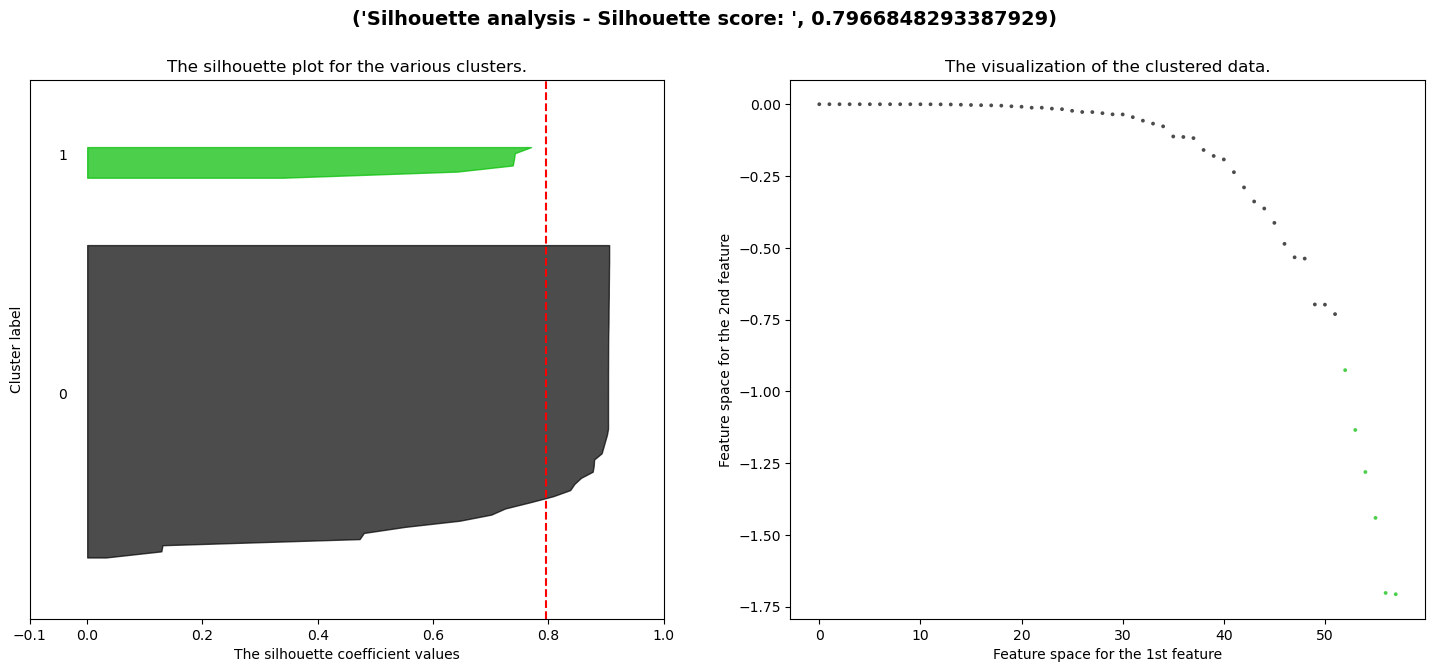

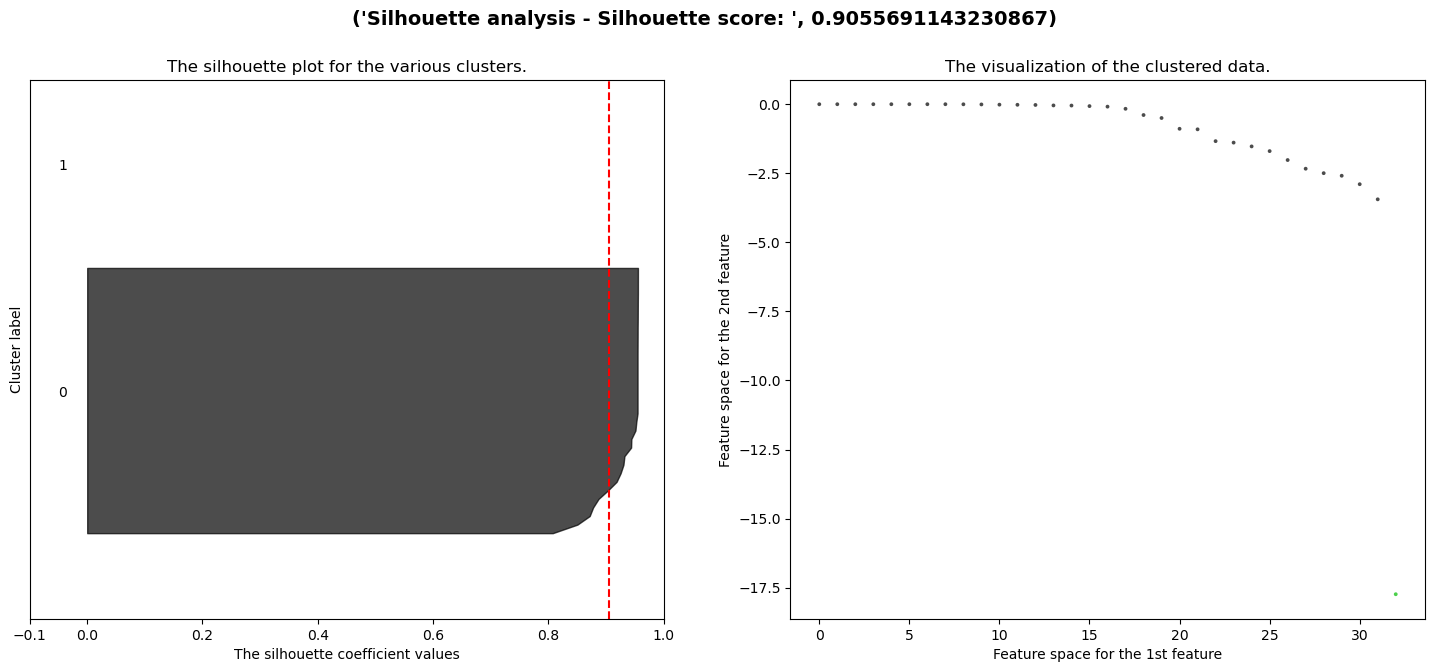

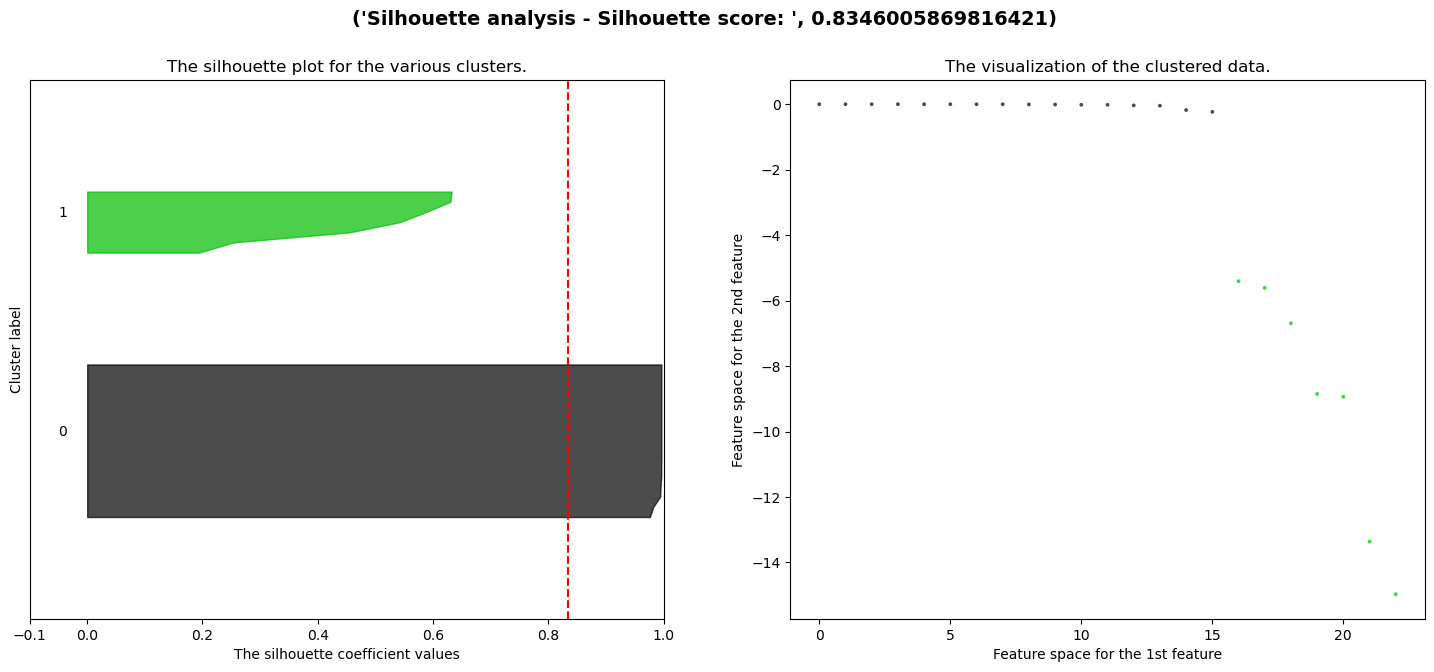

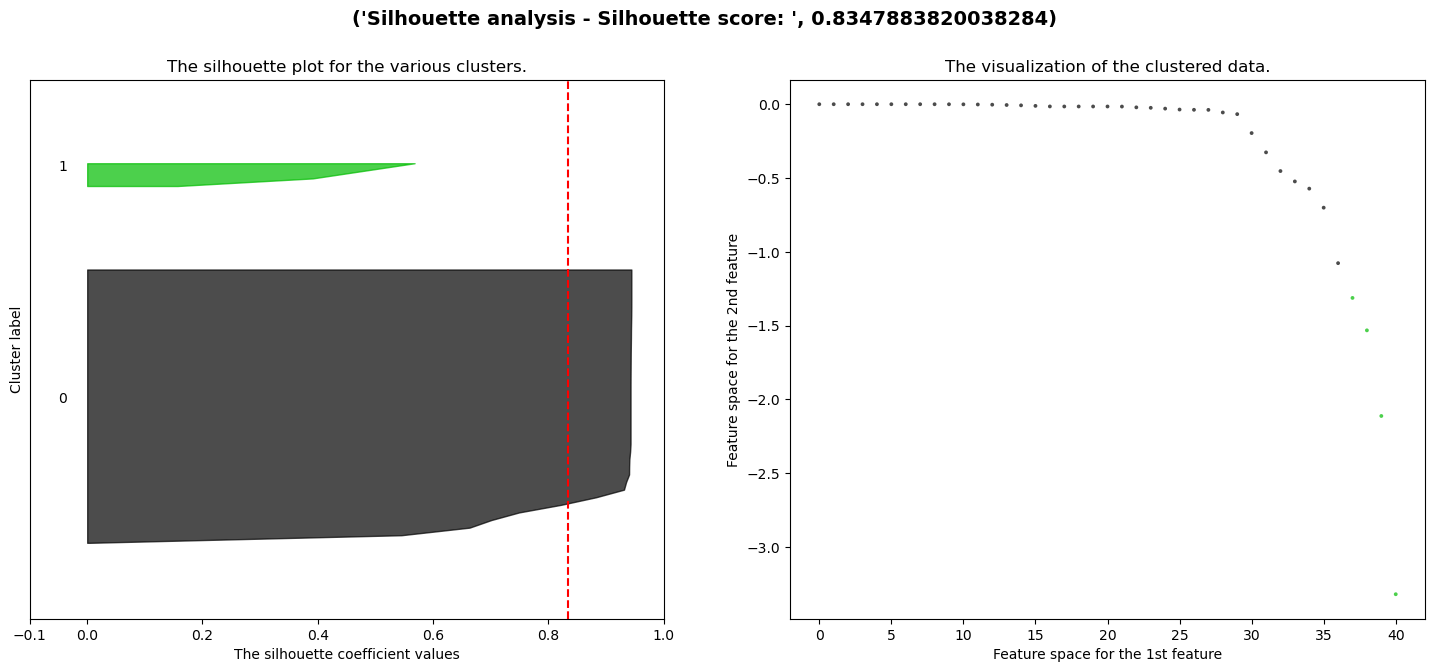

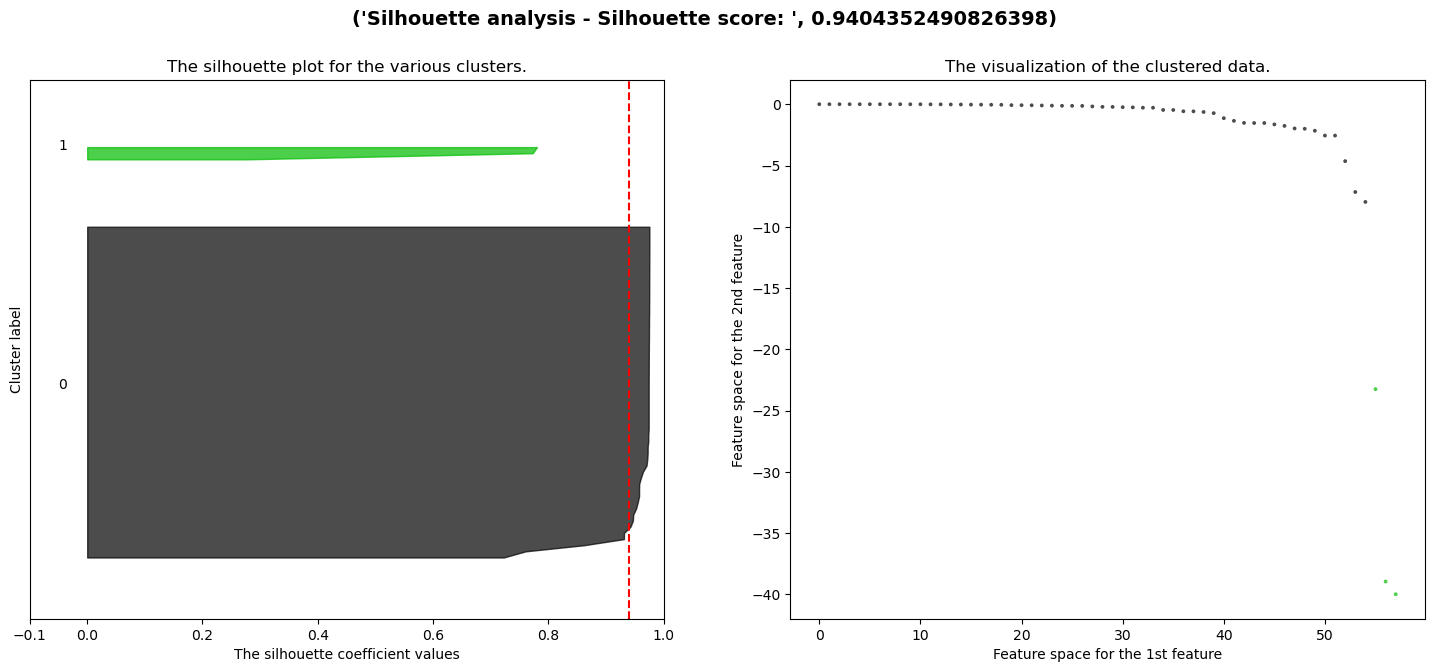

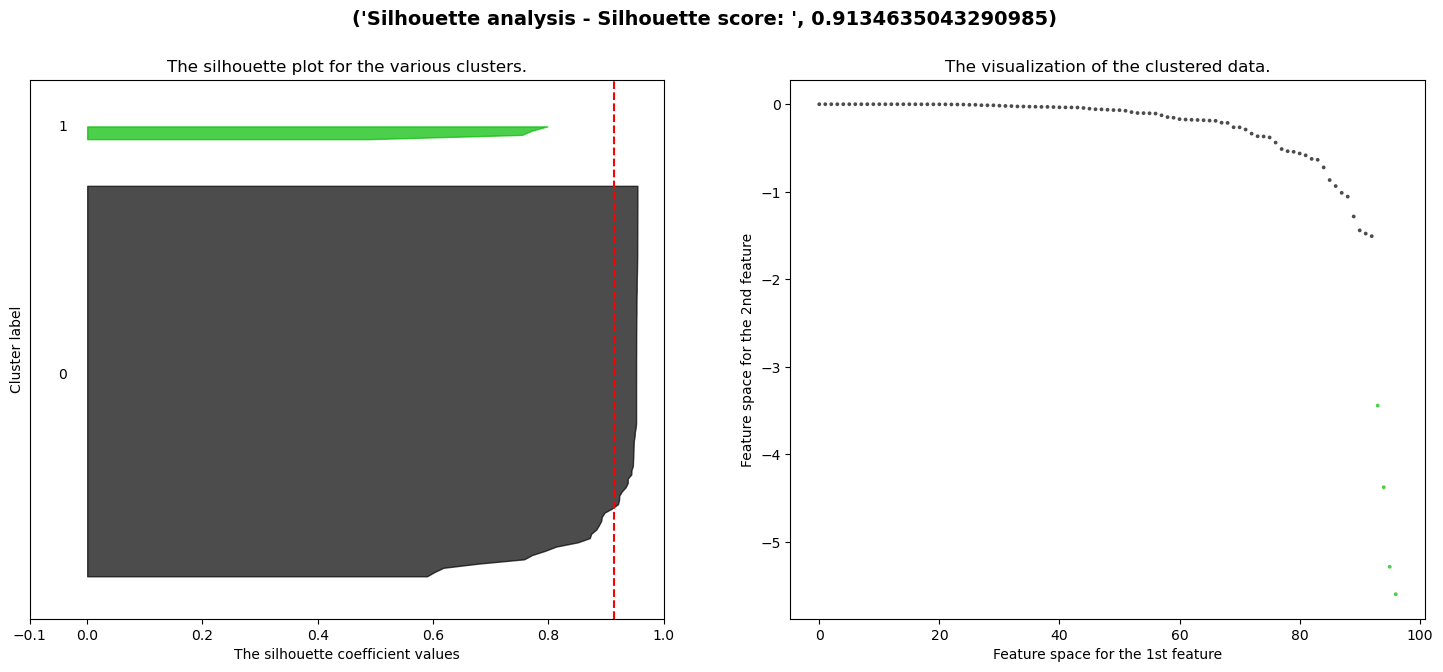

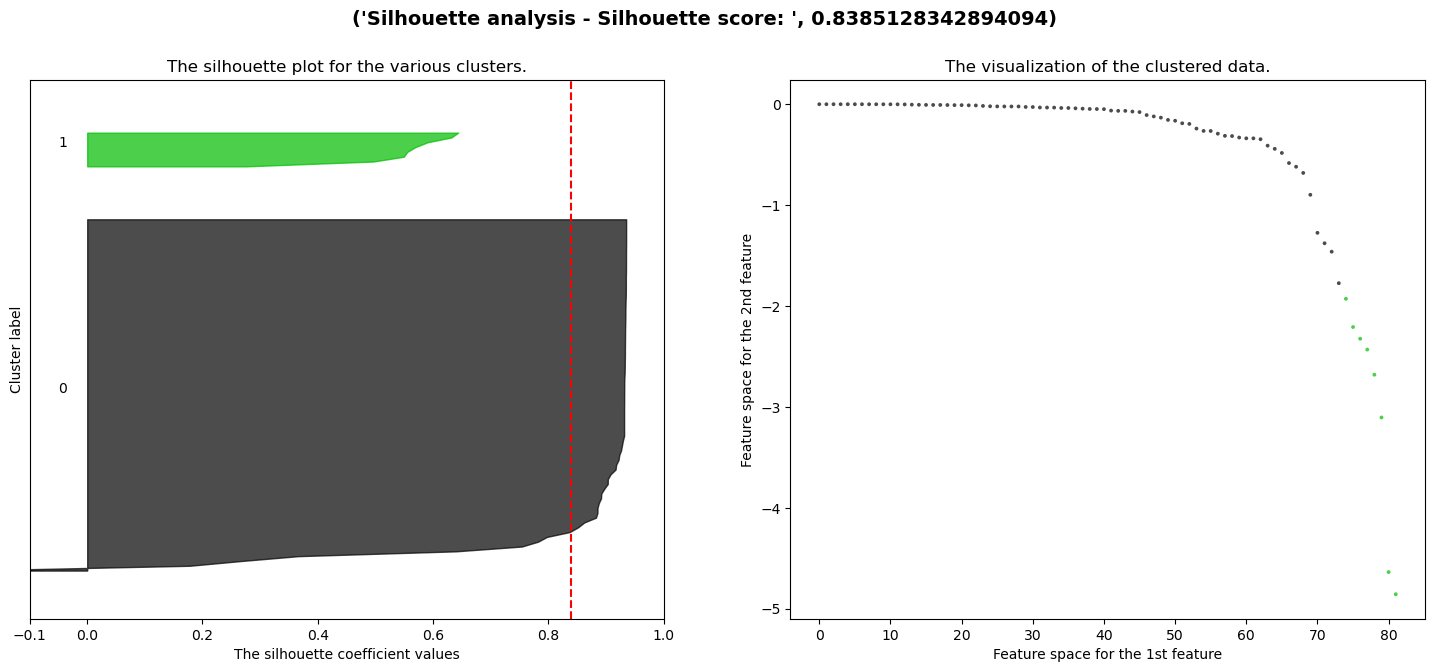

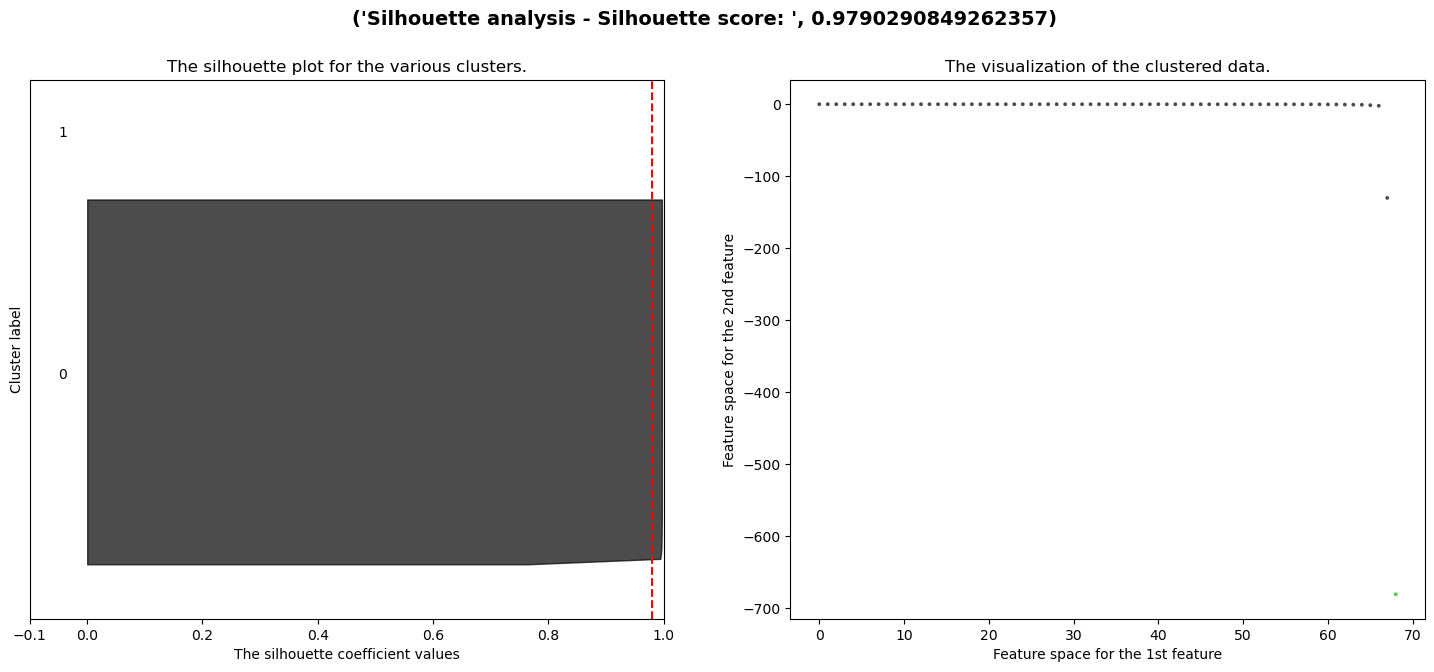

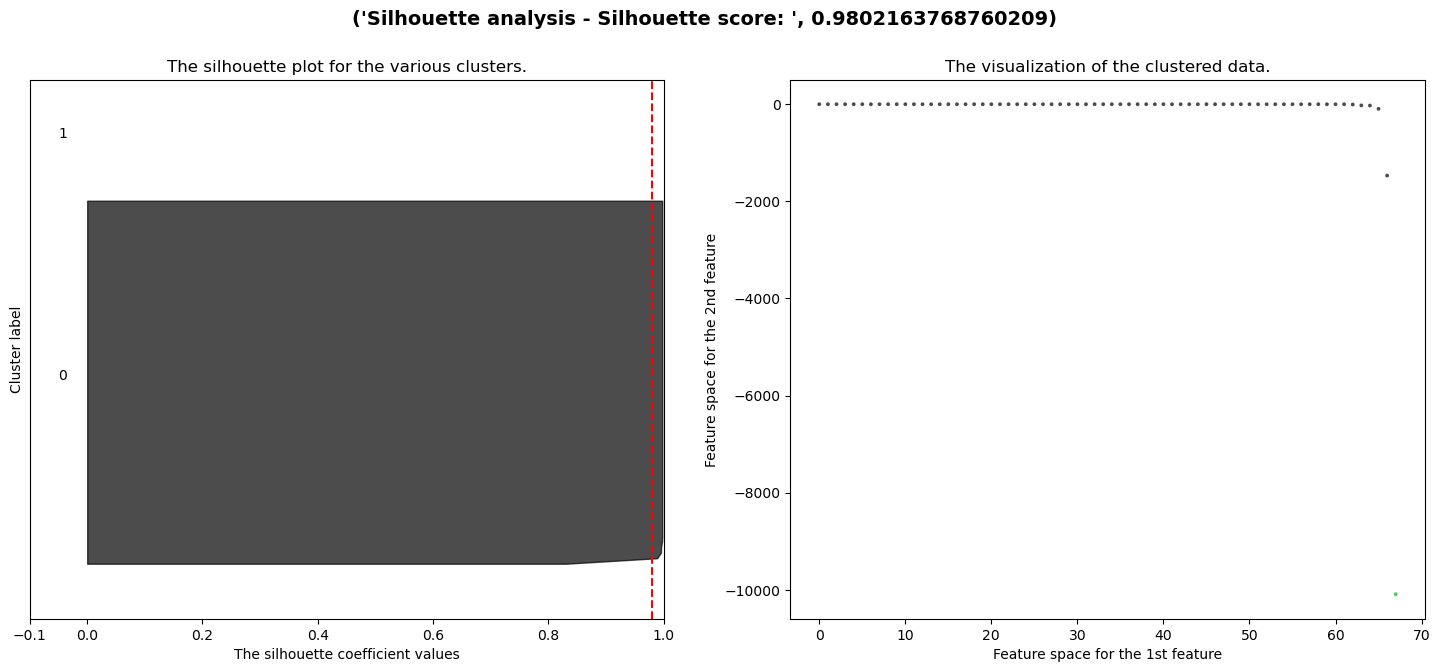

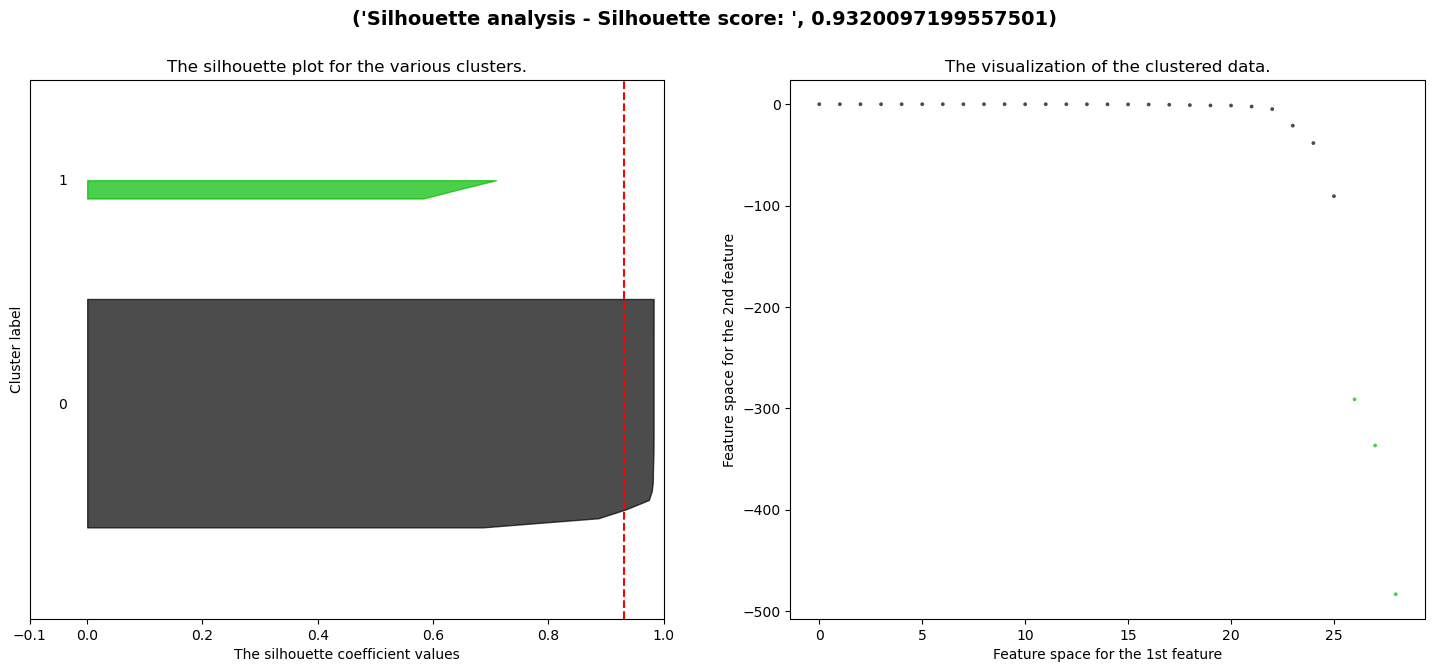

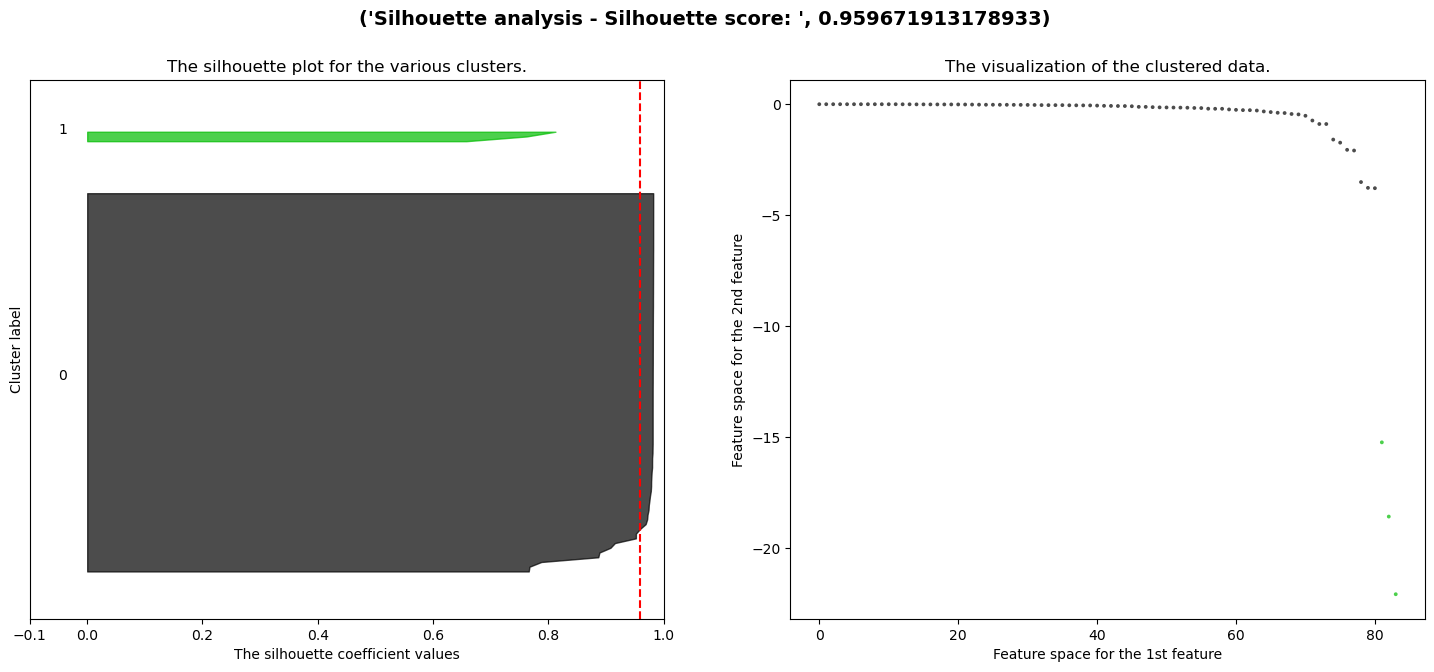

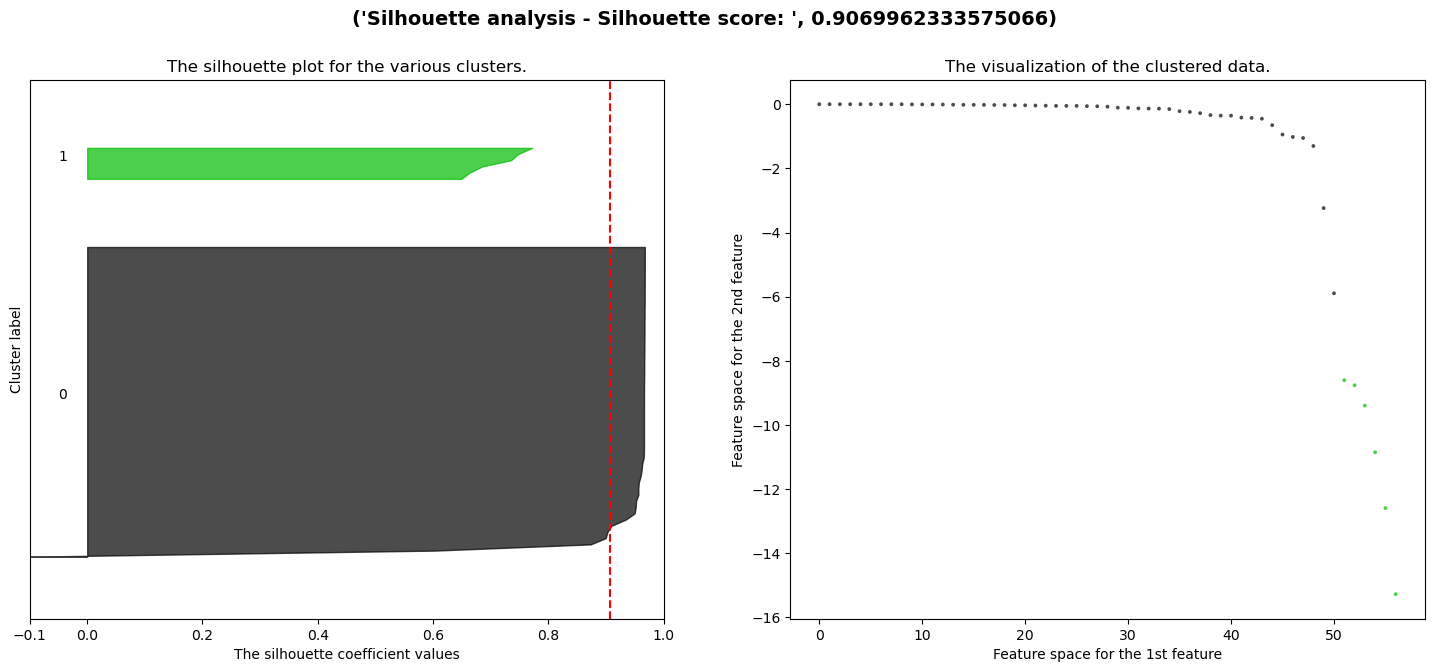

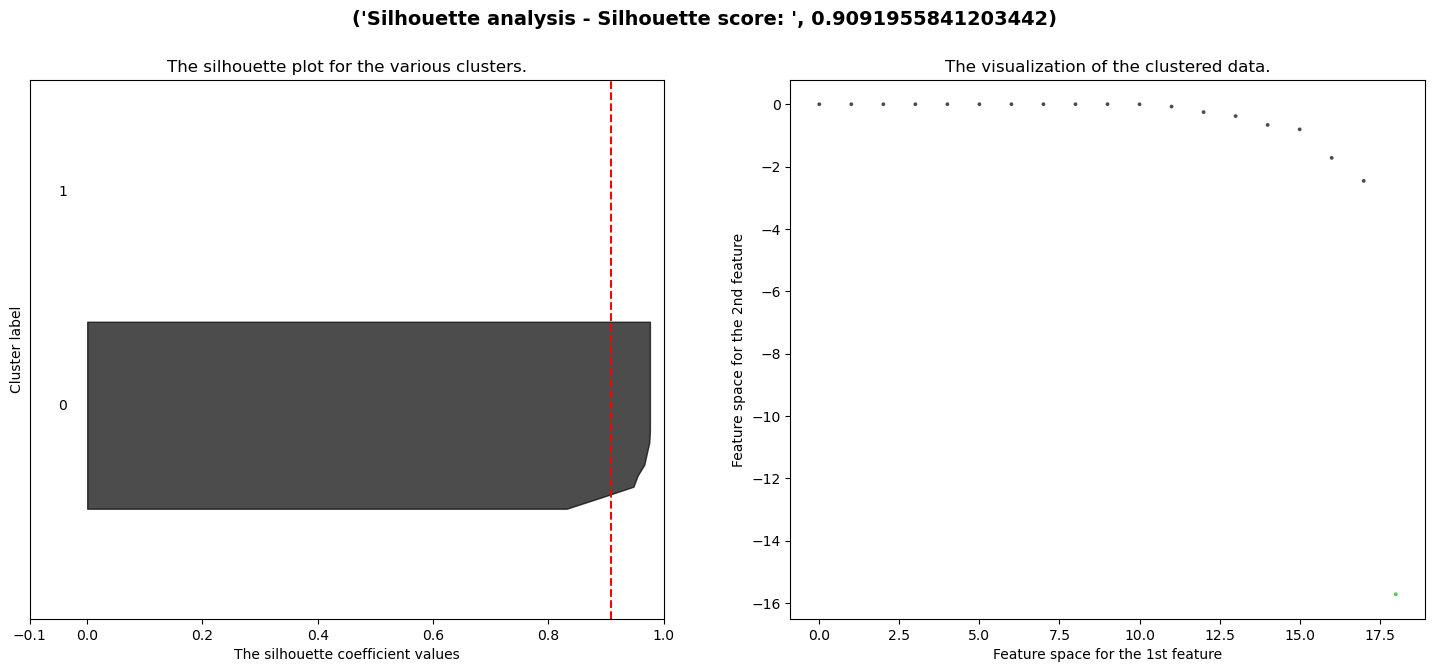

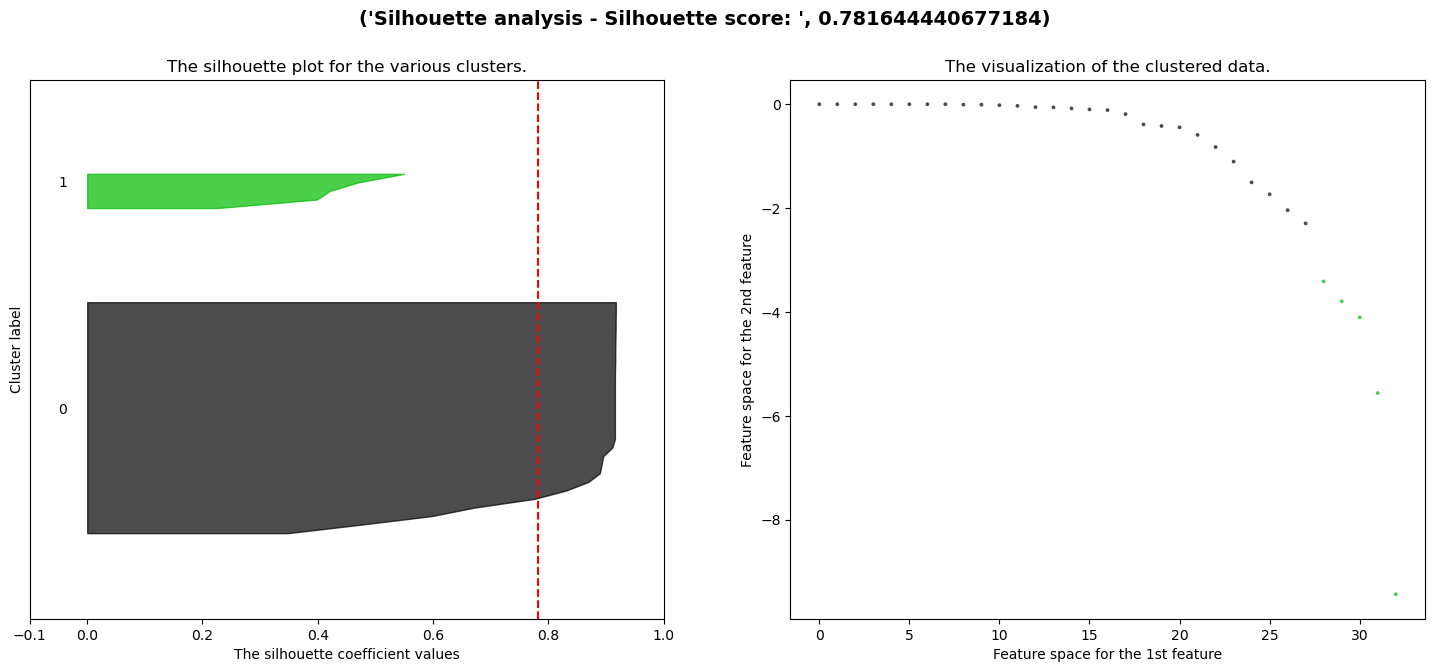

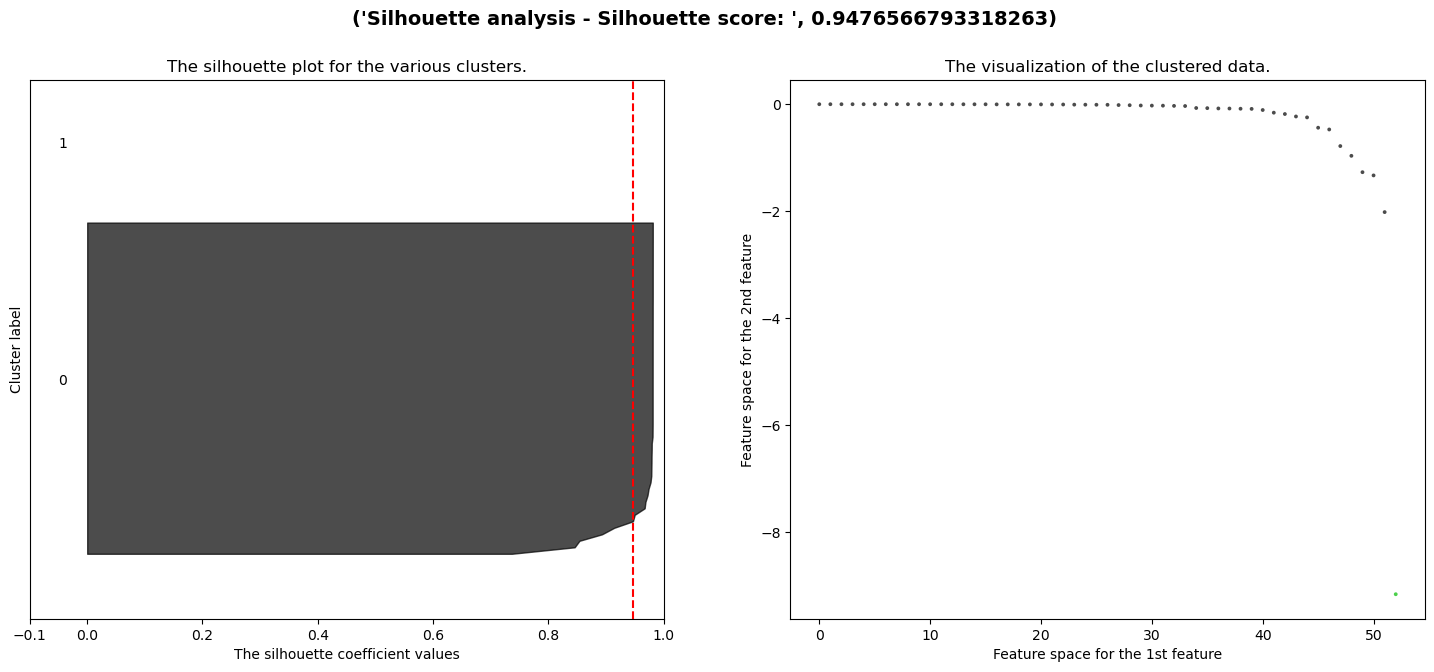

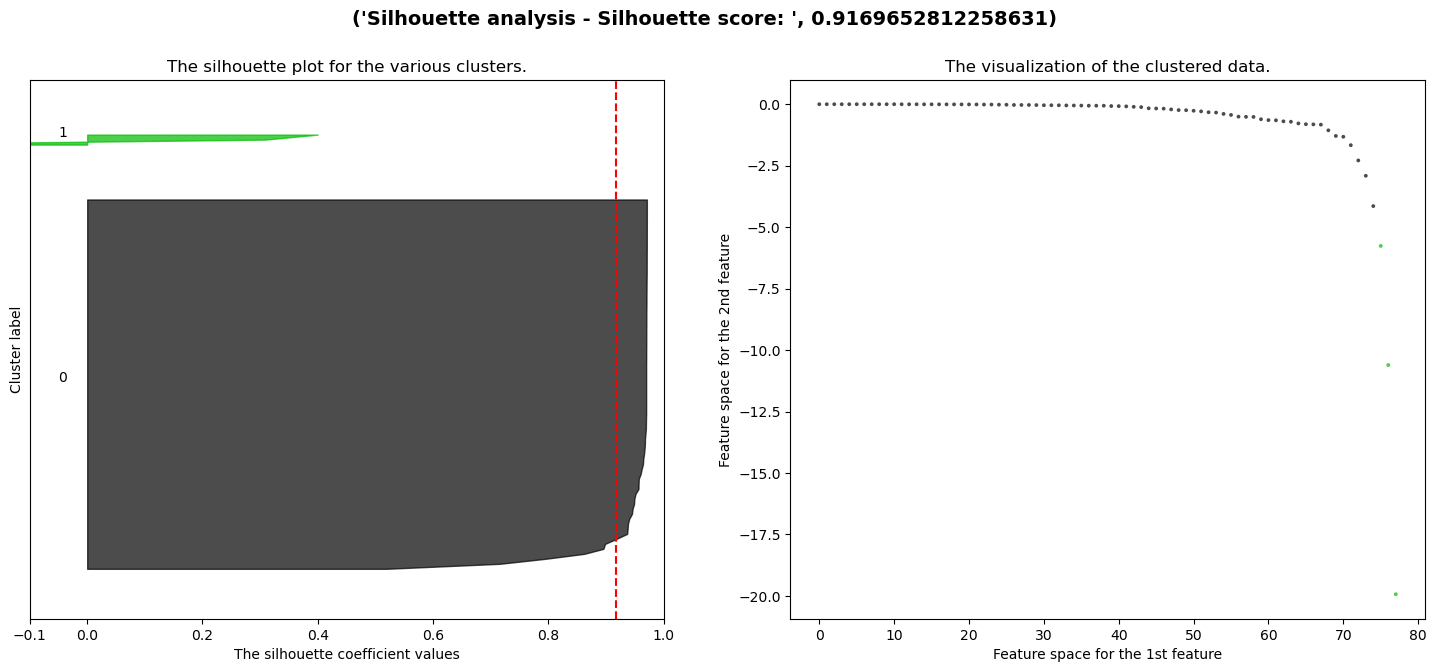

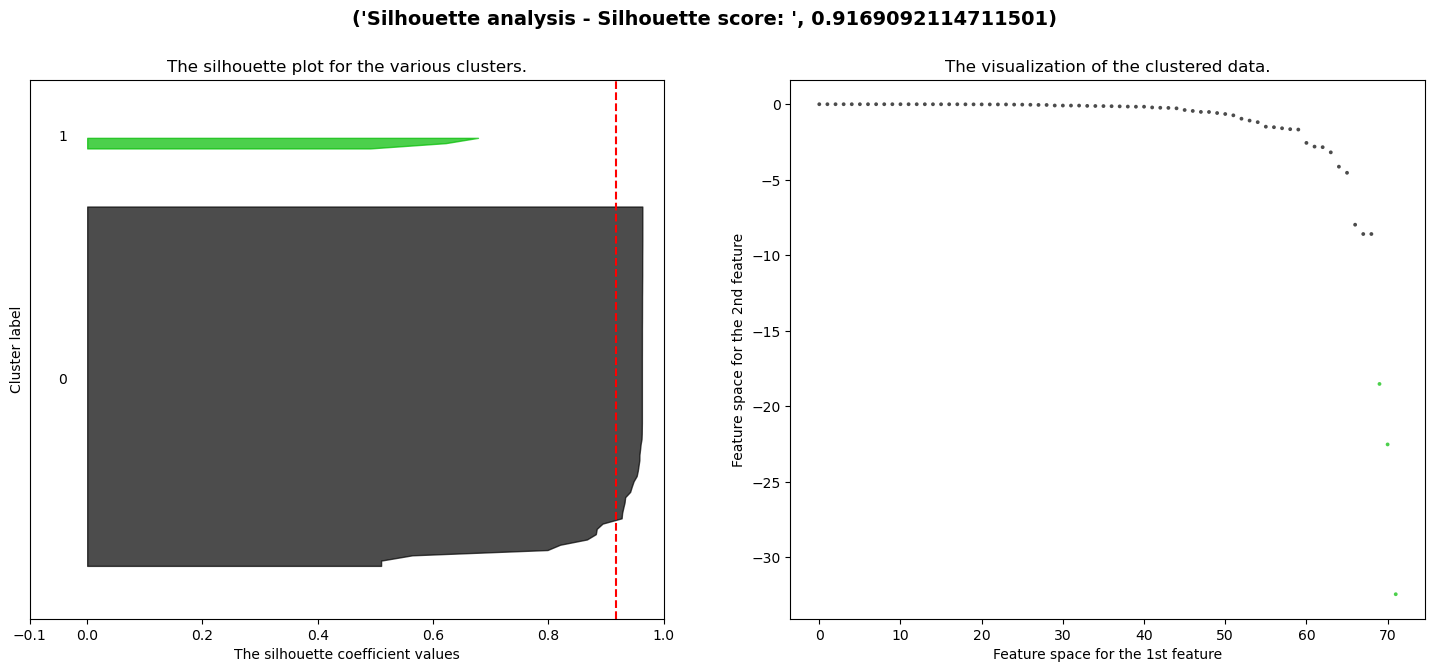

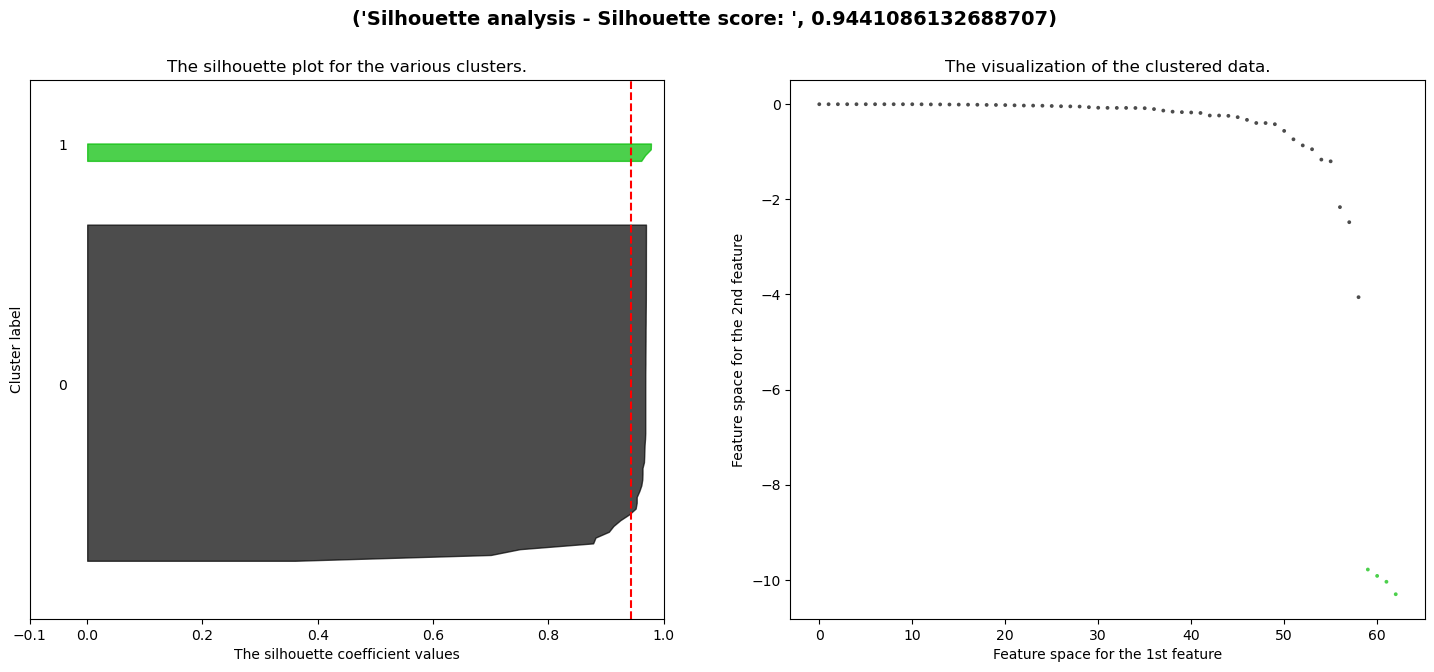

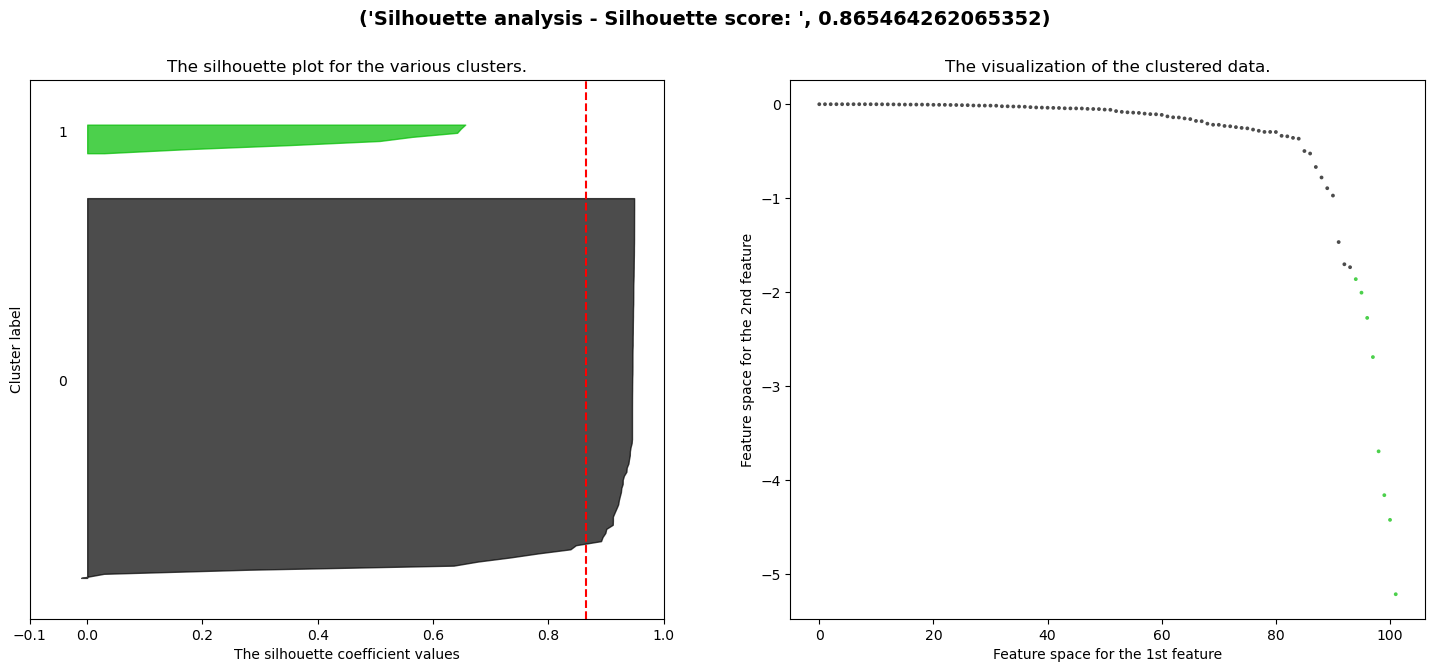

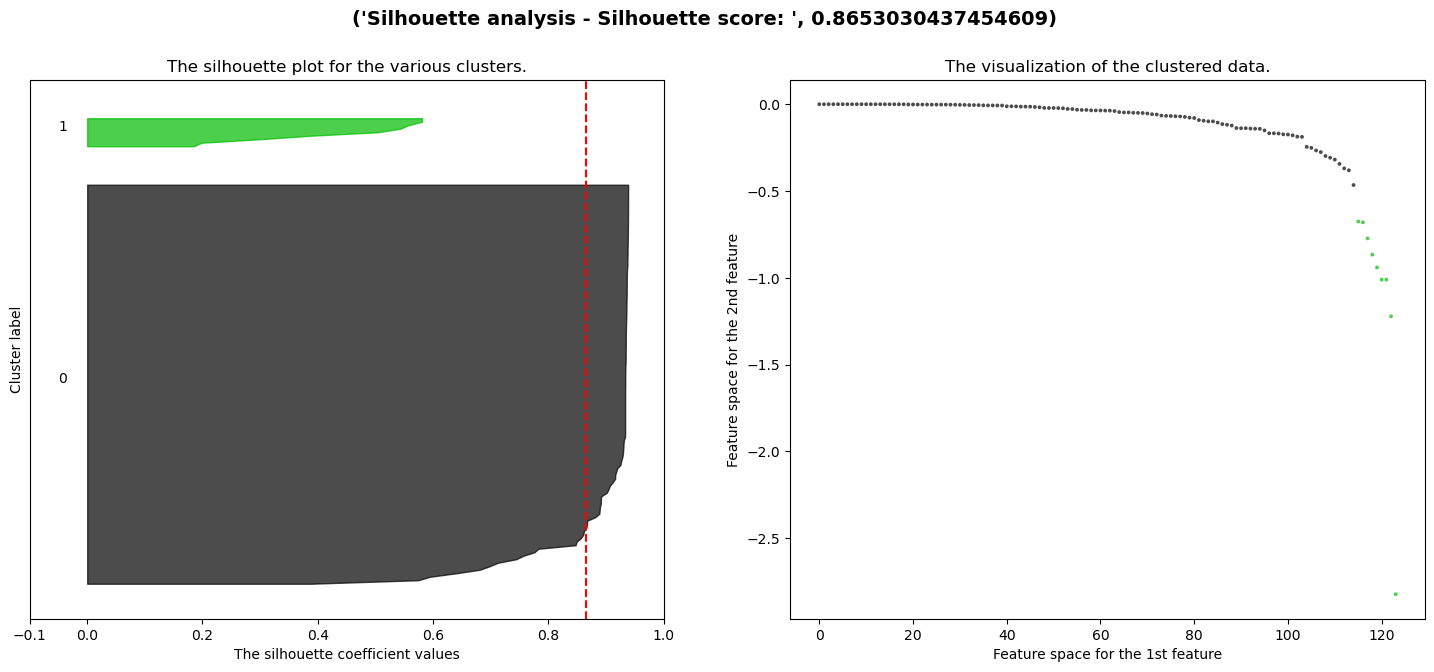

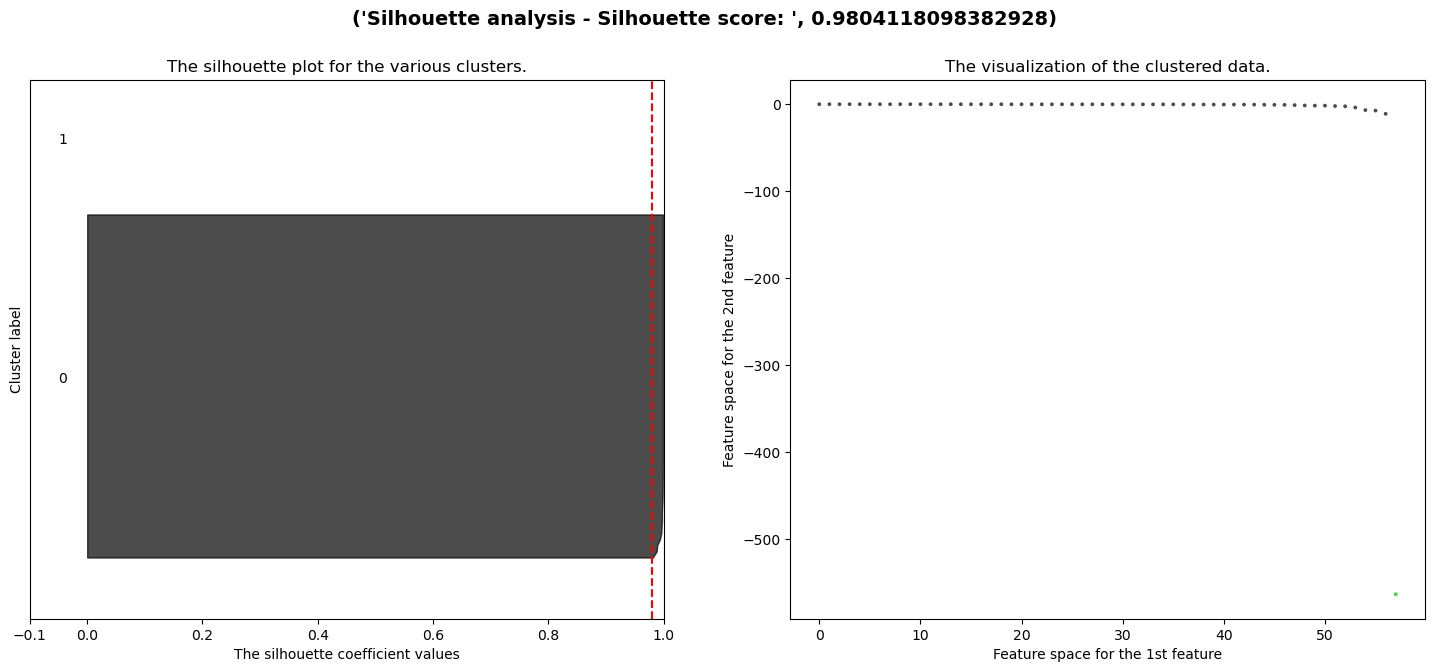

In [14]:
for i in range(len(silhouette_scores)):
    for j in range(len(silhouette_scores[i])):
        plot_silhouette(silhouette_scores[i][j], labels_array[i][j], silhouette_avgs[i][j], values_array[i][j], -thresholds[i][j])

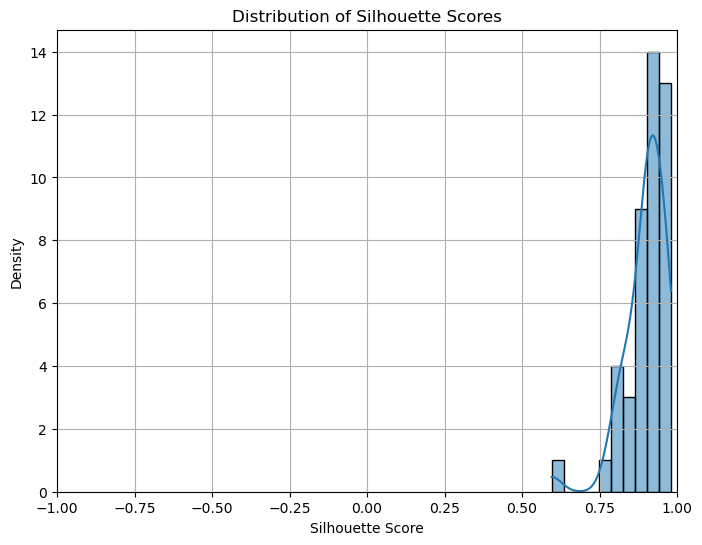

In [15]:
# Create a histogram to visualize the distribution
plt.figure(figsize=(8, 6))
sns.histplot(list(chain.from_iterable(silhouette_avgs)), bins='auto', kde=True)  # kde=True plots a kernel density estimate along with the histogram

# Label the axes and add a title
plt.xlabel("Silhouette Score")
plt.ylabel("Density")
plt.title("Distribution of Silhouette Scores")

plt.grid(True)
plt.xlim(-1, 1)  # Set limits for silhouette scores (typically between -1 and 1)

# Display the plot
plt.show()

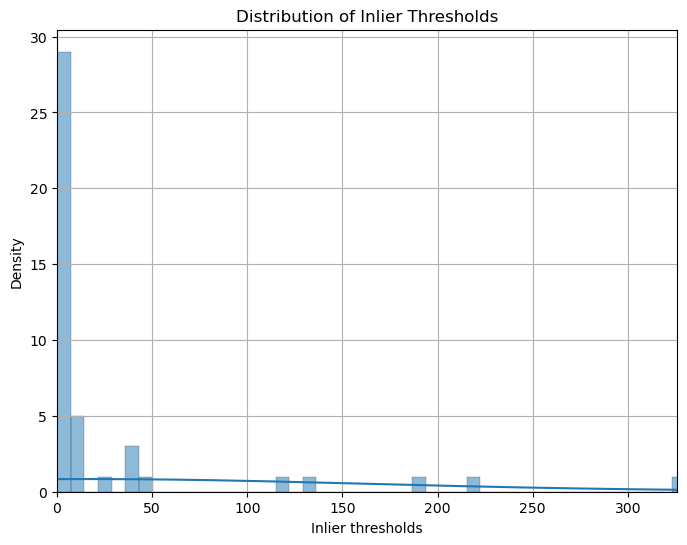

In [16]:
# Create a histogram to visualize the distribution
plt.figure(figsize=(8, 6))
sns.histplot(list(chain.from_iterable(thresholds)), bins='auto', kde=True)  # kde=True plots a kernel density estimate along with the histogram

# Label the axes and add a title
plt.xlabel("Inlier thresholds")
plt.ylabel("Density")
plt.title("Distribution of Inlier Thresholds")

plt.grid(True)
plt.xlim(0, max(max(thresholds)))  # Set limits for silhouette scores (typically between -1 and 1)

# Display the plot
plt.show()

In [17]:
errors = []
average_error = {}

for i in range(len(names)):
    data = mat_data[names[i]]
    threshold = thresholds[i]
    average_errors = analyze_reprojection_error(data, threshold, type='FM')
    tmp_vals = average_errors.values()
    min_val = min(tmp_vals)
    idx = 0
    for h in range(len(tmp_vals)):
        if list(tmp_vals)[h] == min_val: idx = h
    min_t = list(average_errors.keys())[idx]
    print("Average reprojection errors for inliers:")
    average_error[min_t] = average_errors.get(min_t)
    for threshold, error in average_errors.items():
        print(f"Threshold: {threshold}, Average Reprojection Error: {error:.4f}")
          #errors.append(error)
    errors.append(average_error[min_t])

152.0 inliers found
152.0 inliers found
152.0 inliers found
152.0 inliers found
Average reprojection errors for inliers:
Threshold: 4.26279851308532, Average Reprojection Error: 9.4991
Threshold: 41.27489594490595, Average Reprojection Error: 9.4991
Threshold: 3.4094551943261413, Average Reprojection Error: 9.4991
Threshold: 5.471614421055898, Average Reprojection Error: 9.4991
115.0 inliers found
115.0 inliers found
115.0 inliers found
Average reprojection errors for inliers:
Threshold: 325.8329070751438, Average Reprojection Error: 17.9021
Threshold: 9.070957638078777, Average Reprojection Error: 17.9021
Threshold: 47.79950417383173, Average Reprojection Error: 17.9021
135.0 inliers found
Average reprojection errors for inliers:
Threshold: 2.0854626006192545, Average Reprojection Error: 0.3149
58.0 inliers found
Average reprojection errors for inliers:
Threshold: 1.247516977915652, Average Reprojection Error: 0.2070
83.0 inliers found
Average reprojection errors for inliers:
Threshol

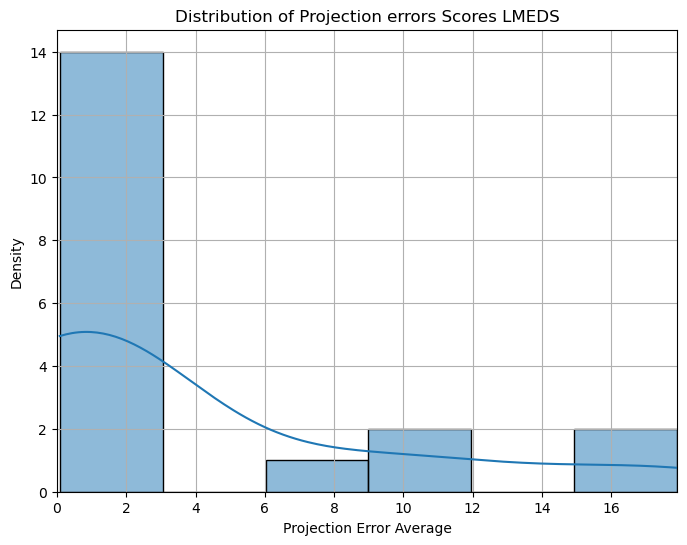

In [18]:
plt.figure(figsize=(8, 6))
sns.histplot(errors, bins='auto',
             kde=True)  # kde=True plots a kernel density estimate along with the histogram

# Label the axes and add a title
plt.xlabel("Projection Error Average")
plt.ylabel("Density")
plt.title("Distribution of Projection errors Scores LMEDS")

plt.grid(True)
plt.xlim(0, max(errors))

# Display the plot
plt.show()

In [19]:
errors.clear()
for i in range(len(names)):
    data = mat_data[names[i]]
    res=compute_inliers_residual_curve(data)

    threshold = thresholds[i]
    average_errors = analyze_reprojection_error(data, threshold, method="ransac", type='FM')
    tmp_vals = average_errors.values()
    min_val = min(tmp_vals)
    idx = 0
    for h in range(len(tmp_vals)):
        if list(tmp_vals)[h] == min_val: idx = h
    min_t = list(average_errors.keys())[idx]
    print("Average reprojection errors for inliers:")
    average_error[min_t] = average_errors.get(min_t)
    for threshold, error in average_errors.items():
        print(f"Threshold: {threshold}, Average Reprojection Error: {error:.4f}")
          #errors.append(error)
    errors.append(average_error[min_t])

139.0 inliers found
158.0 inliers found
120.0 inliers found
136.0 inliers found
Average reprojection errors for inliers:
Threshold: 4.26279851308532, Average Reprojection Error: 2.1994
Threshold: 41.27489594490595, Average Reprojection Error: 146.4174
Threshold: 3.4094551943261413, Average Reprojection Error: 1.4688
Threshold: 5.471614421055898, Average Reprojection Error: 4.2055
205.0 inliers found
103.0 inliers found
164.0 inliers found
Average reprojection errors for inliers:
Threshold: 325.8329070751438, Average Reprojection Error: 1242.1772
Threshold: 9.070957638078777, Average Reprojection Error: 2.7993
Threshold: 47.79950417383173, Average Reprojection Error: 106.3136
126.0 inliers found
Average reprojection errors for inliers:
Threshold: 2.0854626006192545, Average Reprojection Error: 0.3268
53.0 inliers found
Average reprojection errors for inliers:
Threshold: 1.247516977915652, Average Reprojection Error: 0.1303
93.0 inliers found
Average reprojection errors for inliers:
Thre

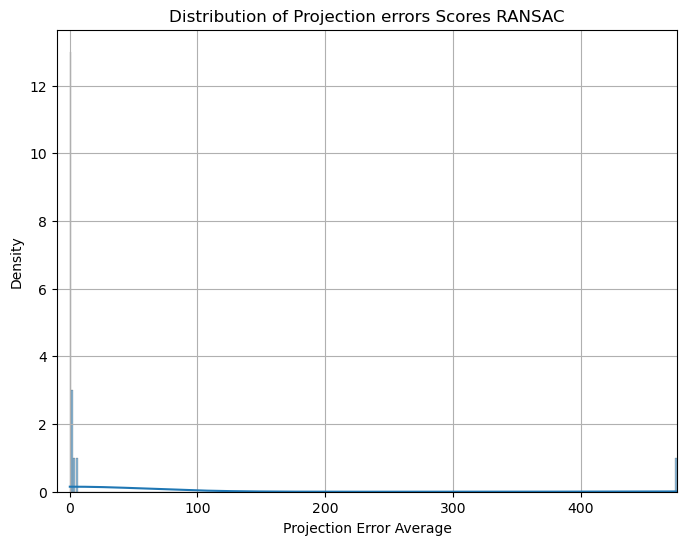

In [20]:
plt.figure(figsize=(8, 6))
sns.histplot(errors, bins='auto',
             kde=True)  # kde=True plots a kernel density estimate along with the histogram

# Label the axes and add a title
plt.xlabel("Projection Error Average")
plt.ylabel("Density")
plt.title("Distribution of Projection errors Scores RANSAC")

plt.grid(True)
plt.xlim(-10, max(errors))

# Display the plot
plt.show()